In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
data = pd.read_csv(r'C:\Users\harsh\OneDrive\Desktop\Banking Segmentation project\Data\UCI_Credit_Card.csv')

#### Dataset Information 
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005

content
There are 25 variables:
ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary = credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [99]:
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [100]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [101]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [103]:
data.shape

(30000, 25)

In [104]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in ID: [    1     2     3 ... 29998 29999 30000]
Unique values in LIMIT_BAL: [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
Unique values in SEX: [2 1]
Unique values in EDUCATION: [2 1 3 5 4 6 0]
Unique values in MARRIAGE: [1 2 3 0]
Unique values in AGE: [24 26 34 37 57 29 23 28 35 51 41 30 

In [105]:
unique_edu = data['EDUCATION'].value_counts()
unique_marriage = data['MARRIAGE'].value_counts()
unique_pay_0 = data['PAY_0'].value_counts()
unique_pay_2 = data['PAY_2'].value_counts()
unique_pay_3 = data['PAY_3'].value_counts()
unique_pay_4 = data['PAY_4'].value_counts()
unique_pay_5 = data['PAY_5'].value_counts()
unique_pay_6 = data['PAY_6'].value_counts()
print(unique_edu, unique_marriage, unique_pay_0, unique_pay_2, unique_pay_3, unique_pay_4, unique_pay_5, unique_pay_6, end="")

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64 MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64 PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64 PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64 PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64 PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64 PAY_5
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64 

In [106]:
print(unique_pay_2)

PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64


In [107]:
data.rename(columns = {'PAY_0':'PAY_1', 'default.payment.next.month':'Default'}, inplace = True)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


SEX

In [108]:
data['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

1 is Male 
2 is Female

In [109]:
data['Default'].groupby(data['SEX']).value_counts(normalize = True)

SEX  Default
1    0          0.758328
     1          0.241672
2    0          0.792237
     1          0.207763
Name: proportion, dtype: float64

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
data['Default'].value_counts()

Default
0    23364
1     6636
Name: count, dtype: int64

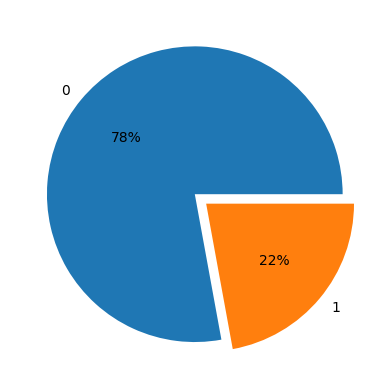

In [112]:
target = data['Default'].value_counts()
keys = [0, 1]
explode = [0, 0.1]

plt.pie(target, labels=keys, explode=explode, autopct='%.0f%%')

plt.show()

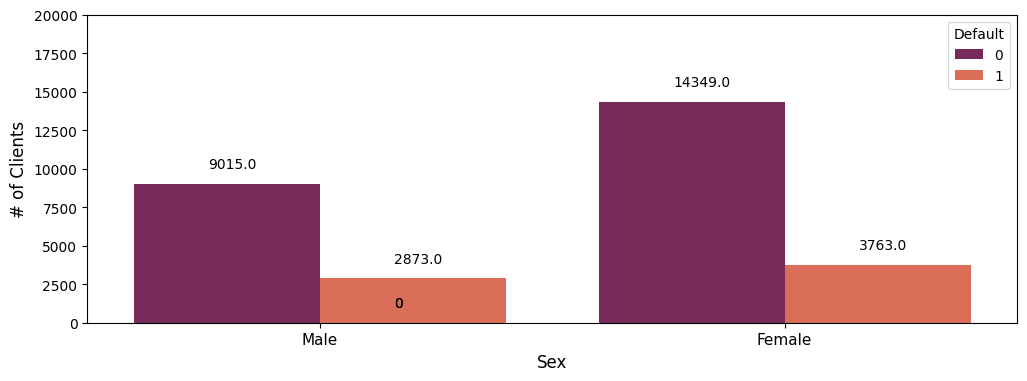

In [113]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data = data, x = 'SEX', hue="Default", palette = 'rocket')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

Education

In [114]:
data['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [115]:
data['Default'].groupby(data['EDUCATION']).value_counts(normalize = True)

EDUCATION  Default
0          0          1.000000
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.935714
           1          0.064286
6          0          0.843137
           1          0.156863
Name: proportion, dtype: float64

In [116]:
data.loc[:, 'EDUCATION'] = data.loc[:, 'EDUCATION'].replace(0,4)
data.loc[:, 'EDUCATION'] = data.loc[:, 'EDUCATION'].replace(5,4)
data.loc[:, 'EDUCATION'] = data.loc[:, 'EDUCATION'].replace(6,4)

In [117]:
data['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [118]:
data['Default'].groupby(data['EDUCATION']).value_counts(normalize = True)

EDUCATION  Default
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.929487
           1          0.070513
Name: proportion, dtype: float64

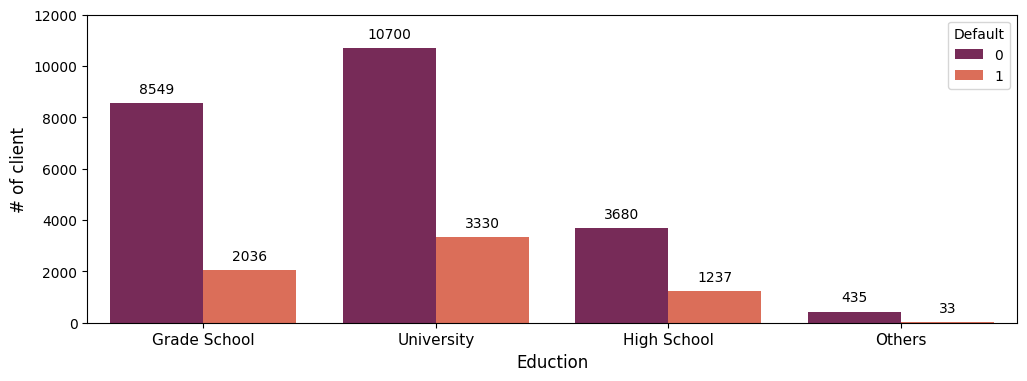

In [119]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data=data, x = 'EDUCATION', hue='Default', palette='rocket')

plt.xlabel('Eduction', fontsize=12)
plt.ylabel('# of client', fontsize=12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3], ['Grade School','University','High School', 'Others'], fontsize = 11)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)


plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\3774997205.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'EDUCATION', y = 'Default', data=data, palette = 'rocket', errorbar=None)


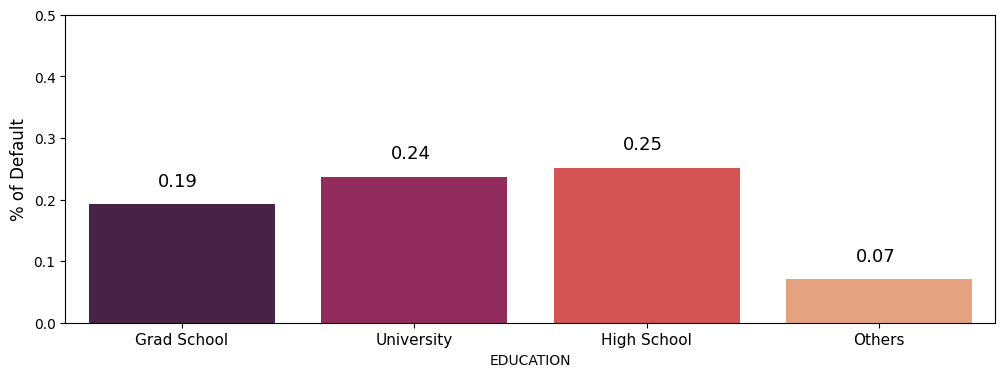

In [120]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = 'EDUCATION', y = 'Default', data=data, palette = 'rocket', errorbar=None)

plt.ylabel("% of Default", fontsize = 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3], ['Grad School', 'University', 'High School', 'Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03), fontsize=13)
    
plt.show()

MARITAL STATUS

In [121]:
data['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [122]:
data['Default'].groupby(data['MARRIAGE']).value_counts(normalize=True)

MARRIAGE  Default
0         0          0.907407
          1          0.092593
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
3         0          0.739938
          1          0.260062
Name: proportion, dtype: float64

In [123]:
data.loc[:, 'MARRIAGE'] = data.loc[:, 'MARRIAGE'].replace(0,3)

In [124]:
data['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

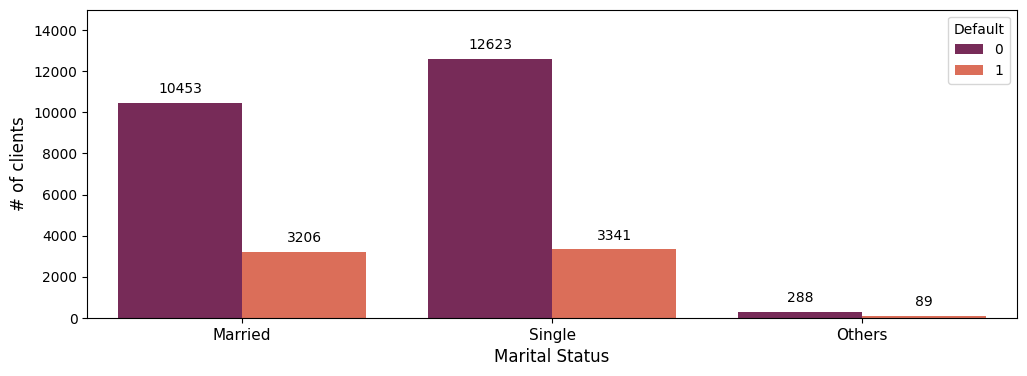

In [125]:
plt.figure(figsize=(12, 4))

ax = sns.countplot(x='MARRIAGE', hue='Default', data=data, palette='rocket')

plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("# of clients", fontsize=12)
plt.ylim(0, 15000)
plt.xticks([0, 1, 2], ['Married', 'Single', 'Others'], fontsize=11)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2946022445.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x = "MARRIAGE", y = "Default", data=data, palette='rocket', errorbar=None)


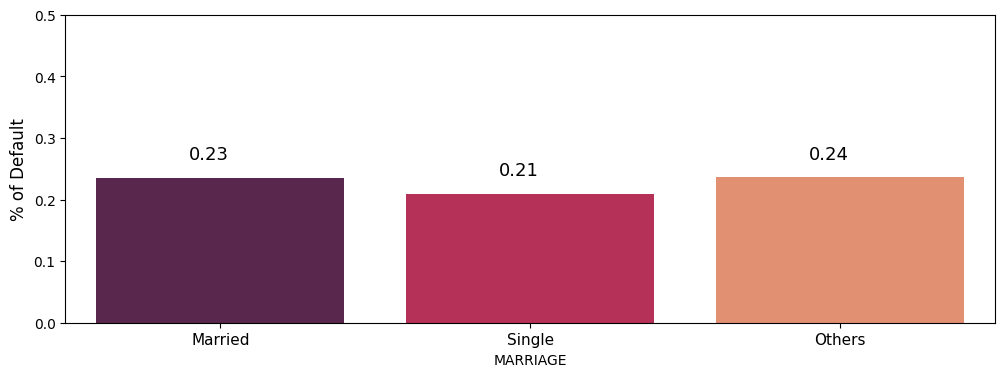

In [126]:
plt.figure(figsize=(12,4))

ax= sns.barplot(x = "MARRIAGE", y = "Default", data=data, palette='rocket', errorbar=None)

plt.ylabel("% of Default", fontsize = 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize=11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03), fontsize=13)

plt.show()

Sex + Education/marital Status

In [127]:
data.groupby(by=['MARRIAGE', 'SEX'])['Default'].value_counts(normalize=True)

MARRIAGE  SEX  Default
1         1    0          0.740655
               1          0.259345
          2    0          0.780375
               1          0.219625
2         1    0          0.773386
               1          0.226614
          2    0          0.802784
               1          0.197216
3         1    0          0.710345
               1          0.289655
          2    0          0.797414
               1          0.202586
Name: proportion, dtype: float64

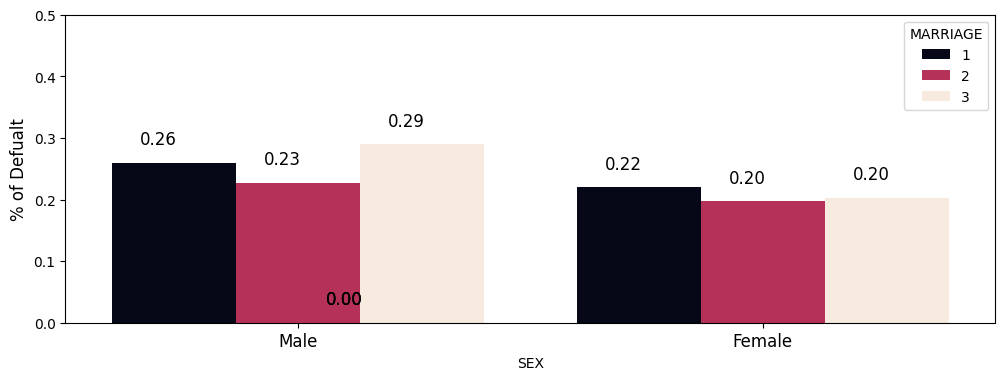

In [128]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = 'SEX', y = 'Default', hue = "MARRIAGE", data=data, palette = 'rocket', errorbar=None)

plt.ylabel("% of Defualt", fontsize = 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male','Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03), fontsize = 12)

plt.show()

In [129]:
data.groupby(by =['EDUCATION','SEX'])['Default'].value_counts(normalize = True)

EDUCATION  SEX  Default
1          1    0          0.791915
                1          0.208085
           2    0          0.818649
                1          0.181351
2          1    0          0.737998
                1          0.262002
           2    0          0.777957
                1          0.222043
3          1    0          0.726131
                1          0.273869
           2    0          0.763580
                1          0.236420
4          1    0          0.917647
                1          0.082353
           2    0          0.936242
                1          0.063758
Name: proportion, dtype: float64

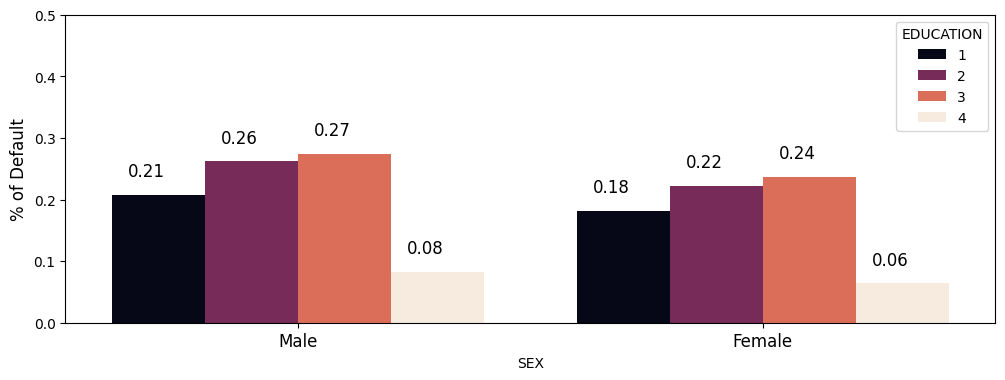

In [130]:
plt.figure(figsize=(12, 4))

ax = sns.barplot(x='SEX', y='Default', hue='EDUCATION', data=data, palette='rocket', errorbar=None)

plt.ylabel("% of Default", fontsize=12)
plt.ylim(0, 0.5)
plt.xticks([0, 1], ['Male', 'Female'], fontsize=12)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        ax.annotate("%.2f" % height, (p.get_x() + 0.035, height + 0.03), fontsize=12)

plt.show()



AGE

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\1937893441.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AGE'])


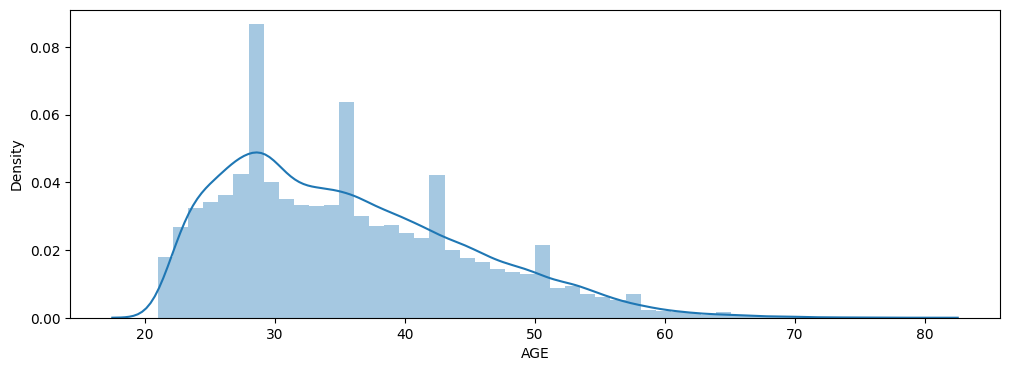

In [131]:
plt.figure(figsize=(12,4))

sns.distplot(data['AGE'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

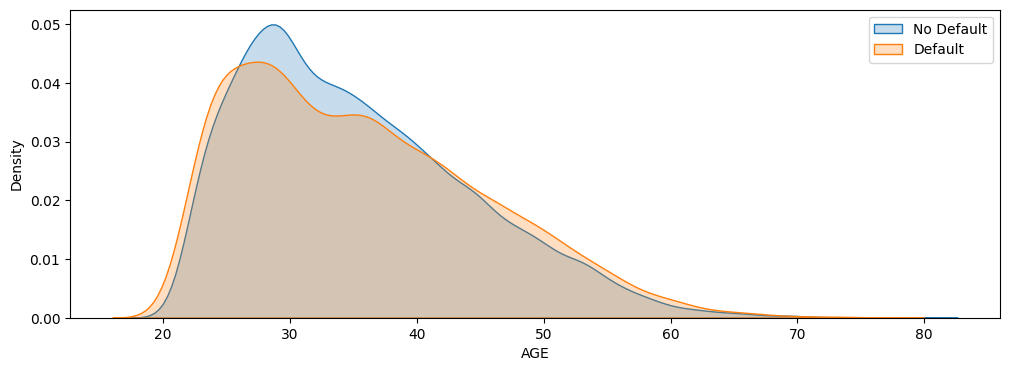

In [132]:
plt.figure(figsize=(12,4))

sns.kdeplot(data.loc[(data['Default'] == 0), 'AGE'], label = 'No Default', fill=True)
sns.kdeplot(data.loc[(data['Default'] == 1), 'AGE'], label = 'Default', fill=True)
plt.legend()
plt.show()

In [133]:
data['AgeBin'] = pd.cut(data['AGE'],[20,25,30,35,40,50,60,80])
print(data['AgeBin'].value_counts())

AgeBin
(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: count, dtype: int64


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  float64 
 2   SEX        30000 non-null  int64   
 3   EDUCATION  30000 non-null  int64   
 4   MARRIAGE   30000 non-null  int64   
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  int64   
 7   PAY_2      30000 non-null  int64   
 8   PAY_3      30000 non-null  int64   
 9   PAY_4      30000 non-null  int64   
 10  PAY_5      30000 non-null  int64   
 11  PAY_6      30000 non-null  int64   
 12  BILL_AMT1  30000 non-null  float64 
 13  BILL_AMT2  30000 non-null  float64 
 14  BILL_AMT3  30000 non-null  float64 
 15  BILL_AMT4  30000 non-null  float64 
 16  BILL_AMT5  30000 non-null  float64 
 17  BILL_AMT6  30000 non-null  float64 
 18  PAY_AMT1   30000 non-null  float64 
 19  PAY_AMT2   30000 non-null

In [135]:
data['Default'].groupby(data['AgeBin']).value_counts(normalize=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\347217767.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['Default'].groupby(data['AgeBin']).value_counts(normalize=True)


AgeBin    Default
(20, 25]  0          0.733402
          1          0.266598
(25, 30]  0          0.798516
          1          0.201484
(30, 35]  0          0.805728
          1          0.194272
(35, 40]  0          0.783811
          1          0.216189
(40, 50]  0          0.767027
          1          0.232973
(50, 60]  0          0.747621
          1          0.252379
(60, 80]  0          0.731618
          1          0.268382
Name: proportion, dtype: float64

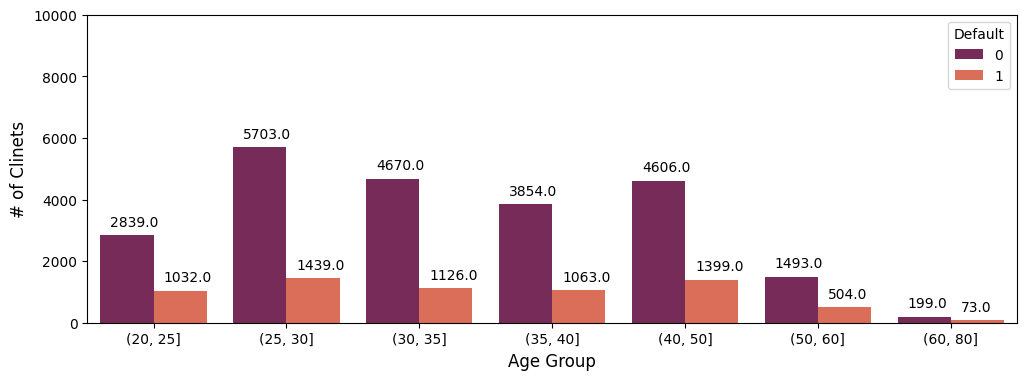

In [136]:
plt.figure(figsize=(12,4))

data['AgeBin'] = data['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]','(25, 30]','(30, 35]','(35, 40]','(40, 50]','(50, 60]','(60, 80]']

ax = sns.countplot(data=data, x = 'AgeBin', hue='Default', palette='rocket', order = AgeBin_order)

plt.xlabel("Age Group", fontsize=12)
plt.ylabel("# of Clinets", fontsize=12)
plt.ylim(0,10000)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate((height), (p.get_x()+0.075, height+300))
    

plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\3109446467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=data, x = 'AgeBin',y='Default', palette='rocket', order = AgeBin_order, errorbar=None)


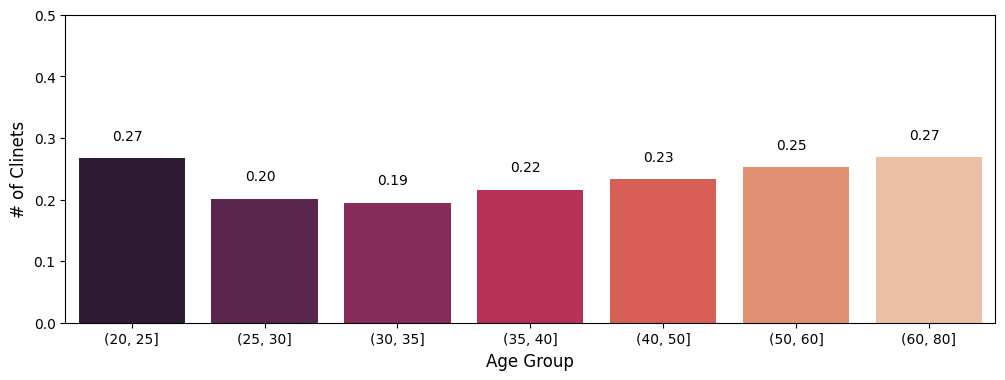

In [137]:
plt.figure(figsize=(12,4))

ax = sns.barplot(data=data, x = 'AgeBin',y='Default', palette='rocket', order = AgeBin_order, errorbar=None)

plt.xlabel("Age Group", fontsize=12)
plt.ylabel("# of Clinets", fontsize=12)
plt.ylim(0,0.5)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate("%.2f" %(height), (p.get_x()+0.25, height+0.03))
    

plt.show()

Amount of Given Credit(LIMIT_BAL)

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\1921378242.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['LIMIT_BAL'])


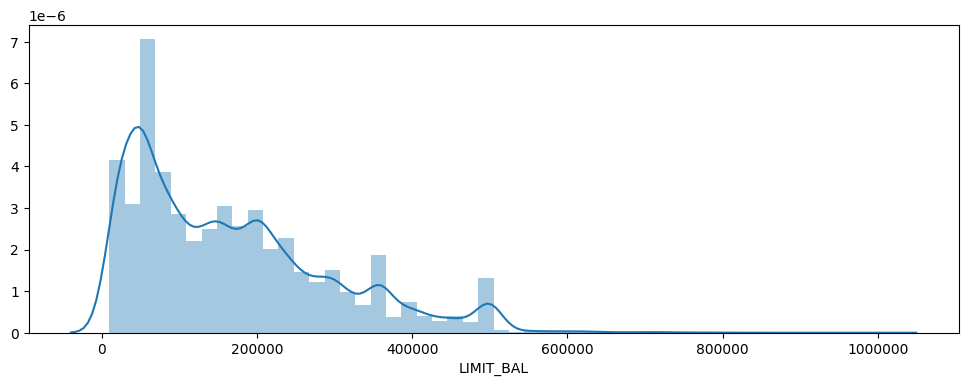

In [138]:
plt.figure(figsize=(12,4))

sns.distplot(data['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.show()

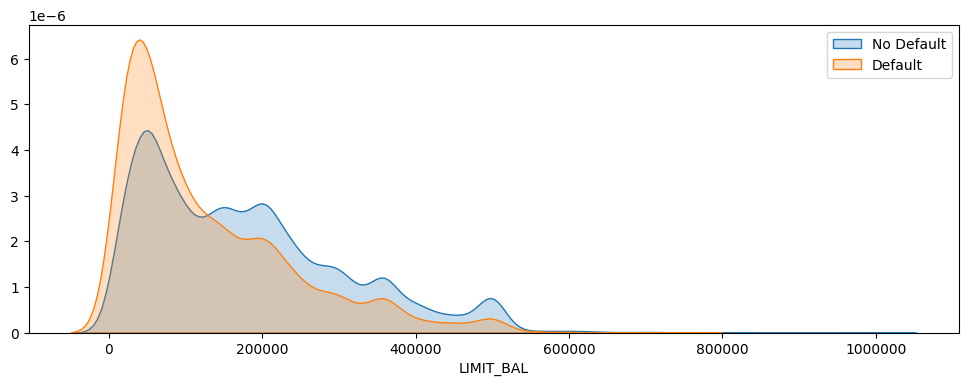

In [139]:
plt.figure(figsize=(12,4))

sns.kdeplot(data.loc[(data['Default']==0), 'LIMIT_BAL'], label = 'No Default', fill=True)
sns.kdeplot(data.loc[(data['Default']==1),'LIMIT_BAL'], label = 'Default', fill=True)

plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.legend()
plt.show()

In [140]:
data['LimitBin'] = pd.cut(data['LIMIT_BAL'],[5000,50000,100000,150000,200000,300000,400000,500000,1100000])
print(data['LimitBin'].value_counts())

LimitBin
(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: count, dtype: int64


In [141]:
data['Default'].groupby(data['LimitBin']).value_counts(normalize = True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\35747798.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['Default'].groupby(data['LimitBin']).value_counts(normalize = True)


LimitBin           Default
(5000, 50000]      0          0.682126
                   1          0.317874
(50000, 100000]    0          0.742016
                   1          0.257984
(100000, 150000]   0          0.788570
                   1          0.211430
(150000, 200000]   0          0.821518
                   1          0.178482
(200000, 300000]   0          0.839494
                   1          0.160506
(300000, 400000]   0          0.859369
                   1          0.140631
(400000, 500000]   0          0.878598
                   1          0.121402
(500000, 1100000]  0          0.888350
                   1          0.111650
Name: proportion, dtype: float64

In [142]:
data['Default'].groupby(data['LimitBin']).value_counts(normalize = True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\35747798.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['Default'].groupby(data['LimitBin']).value_counts(normalize = True)


LimitBin           Default
(5000, 50000]      0          0.682126
                   1          0.317874
(50000, 100000]    0          0.742016
                   1          0.257984
(100000, 150000]   0          0.788570
                   1          0.211430
(150000, 200000]   0          0.821518
                   1          0.178482
(200000, 300000]   0          0.839494
                   1          0.160506
(300000, 400000]   0          0.859369
                   1          0.140631
(400000, 500000]   0          0.878598
                   1          0.121402
(500000, 1100000]  0          0.888350
                   1          0.111650
Name: proportion, dtype: float64

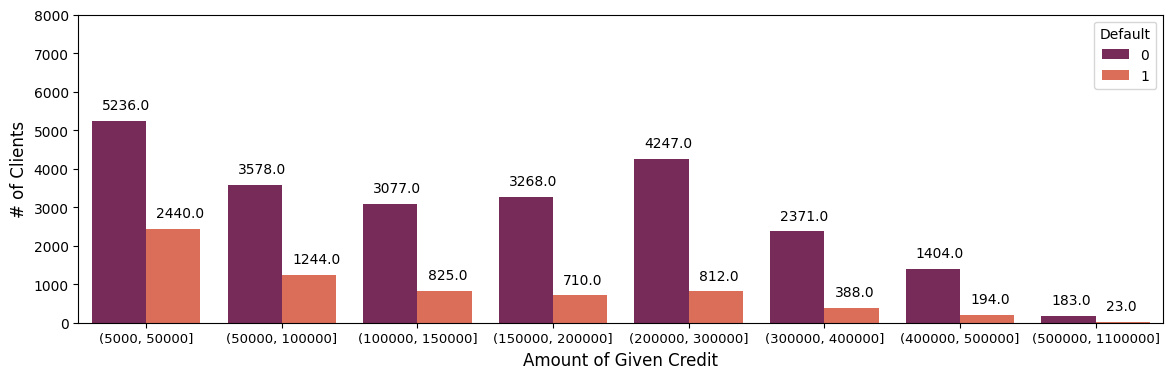

In [143]:
plt.figure(figsize=(14,4))

data['LimitBin'] = data['LimitBin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.countplot(data=data, x = 'LimitBin', hue='Default', palette = 'rocket', order = LimitBin_order)

plt.xlabel('Amount of Given Credit', fontsize = 12)
plt.ylabel('# of Clients', fontsize = 12)
plt.ylim(0,8000)
ax.tick_params(axis = 'x', labelsize = 9.5)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(height, (p.get_x()+0.075, height+300))

plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\1751016410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = "LimitBin", y = "Default", data = data, palette = 'rocket', errorbar = None, order = LimitBin_order)


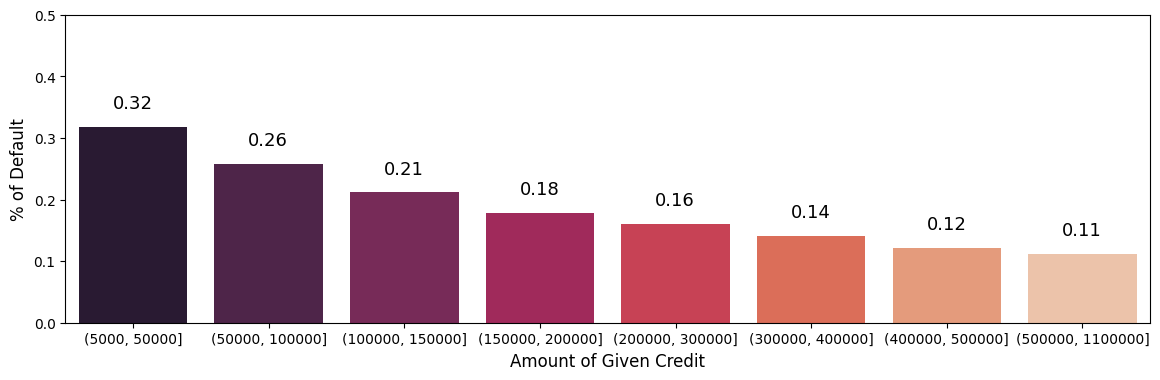

In [144]:
plt.figure(figsize=(14,4))

ax = sns.barplot(x = "LimitBin", y = "Default", data = data, palette = 'rocket', errorbar = None, order = LimitBin_order)

plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

Amount of Given Credit (LIMIT_BAL) + Demographic Features

In [145]:
data.groupby('SEX')['LIMIT_BAL'].mean()

SEX
1    163519.825034
2    170086.462014
Name: LIMIT_BAL, dtype: float64

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\1016214579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data=data, palette = 'rocket', showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"})


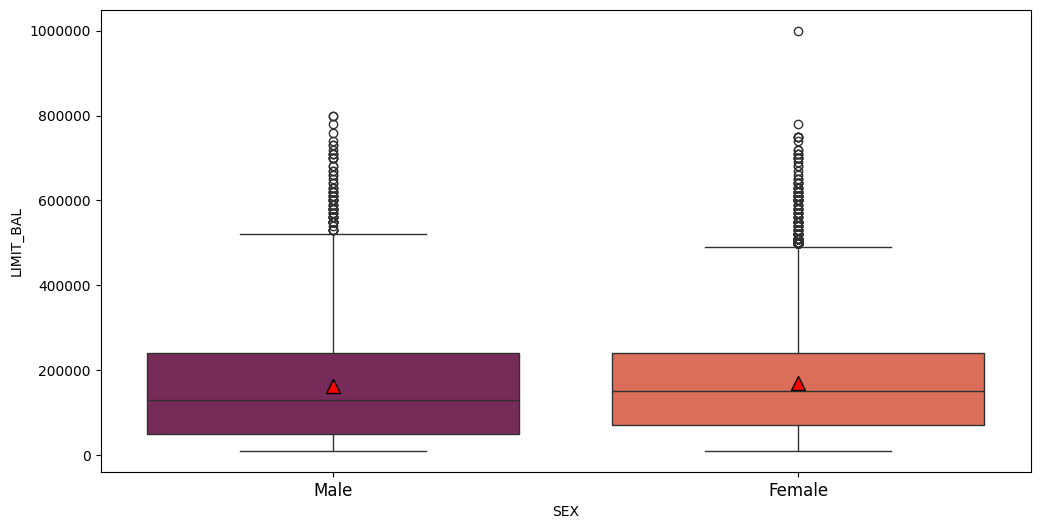

In [146]:
plt.figure(figsize=(12,6))

sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', data=data, palette = 'rocket', showmeans=True, meanprops={"markerfacecolor":"red", "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

plt.show()

In [147]:
data.groupby('EDUCATION')['LIMIT_BAL'].mean()

EDUCATION
1    212956.069910
2    147062.437634
3    126550.270490
4    181316.239316
Name: LIMIT_BAL, dtype: float64

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\3859292378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = data, palette = 'rocket', showmeans=True,


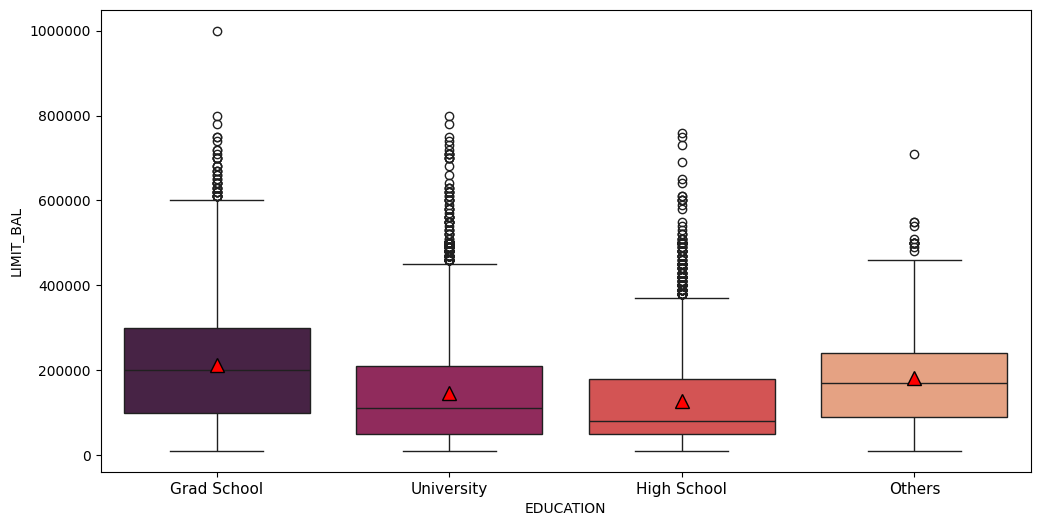

In [148]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", data = data, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis = 'y')

plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)

plt.show()

In [149]:
data.groupby('MARRIAGE')['LIMIT_BAL'].mean()

MARRIAGE
1    182200.893184
2    156413.660737
3    103076.923077
Name: LIMIT_BAL, dtype: float64

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\3688069397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", data = data, palette = 'rocket', showmeans=True,


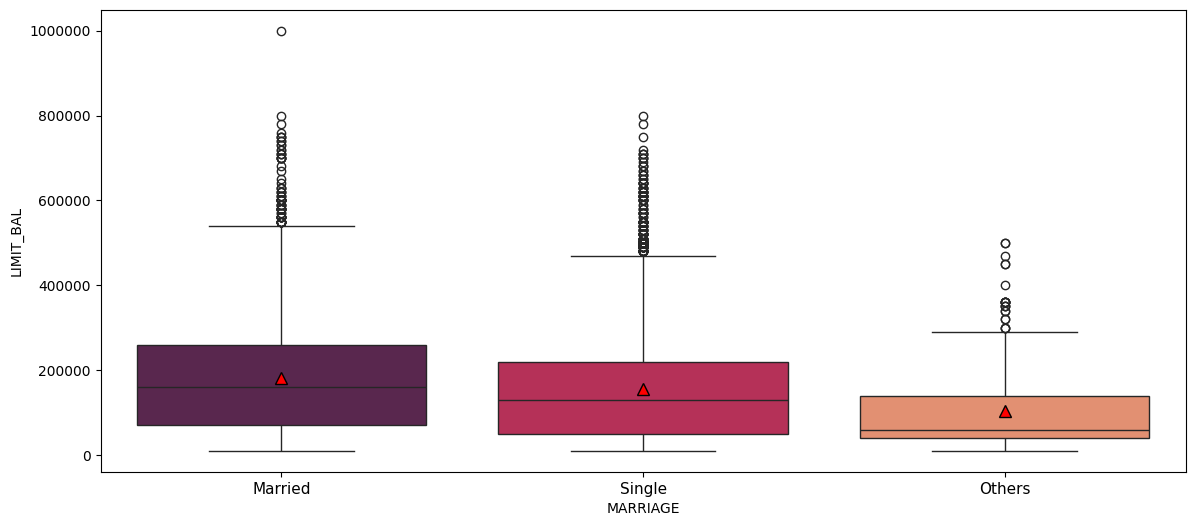

In [150]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", data = data, palette = 'rocket', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"8"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xticks([0,1,2],['Married', 'Single', 'Others'], fontsize = 11)

plt.show()

In [151]:
data.groupby('AgeBin')['LIMIT_BAL'].mean()

AgeBin
(20, 25]     73763.885301
(25, 30]    164320.918510
(30, 35]    197688.060732
(35, 40]    196780.557250
(40, 50]    179680.213156
(50, 60]    159349.023535
(60, 80]    201617.647059
Name: LIMIT_BAL, dtype: float64

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\3920689657.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "AgeBin", y = "LIMIT_BAL",data = data, palette = 'rocket', order = AgeBin_order, showmeans=True,


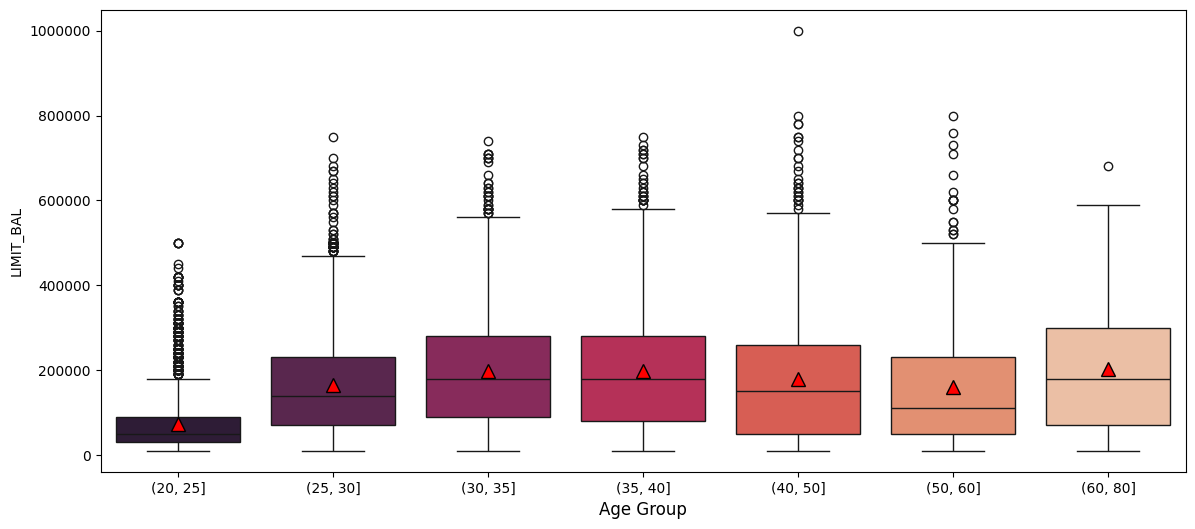

In [152]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL",data = data, palette = 'rocket', order = AgeBin_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()

Overall, the offered credit limit seems to match the ability to pay in time within each category. The exceptions are the unknown categories, which have lower chances of default, but do not lead in the amount of given credit, and the age group of 60+, which, despite having one of the highest chances of default, receives, on average, the highest credit value.by age group.

We could analyze the relationship between the credit limit and the combination of two demographic features to see if we can find something different.

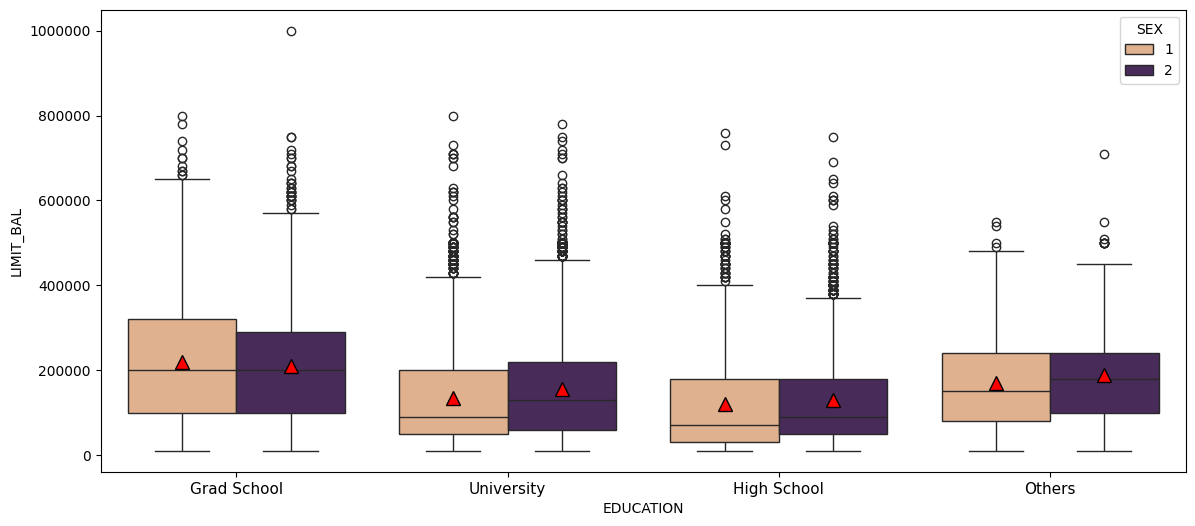

In [153]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "EDUCATION", y = "LIMIT_BAL", hue = 'SEX', data = data, palette = 'flare', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)

plt.show()

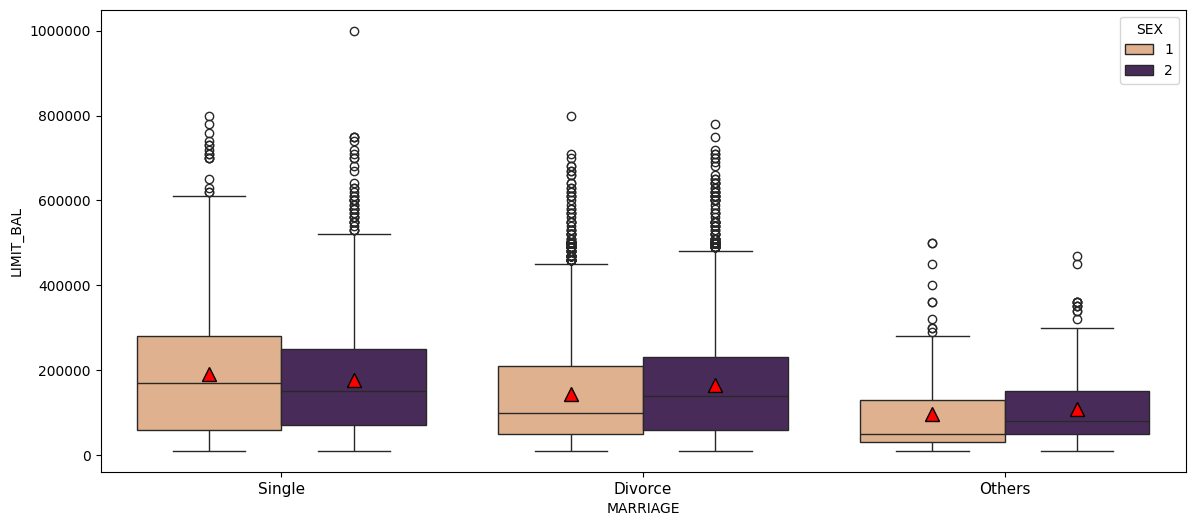

In [154]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "MARRIAGE", y = "LIMIT_BAL", hue = 'SEX', data = data, palette = 'flare', showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation   
plt.xticks([0,1,2],['Single','Divorce','Others'], fontsize = 11)

plt.show()

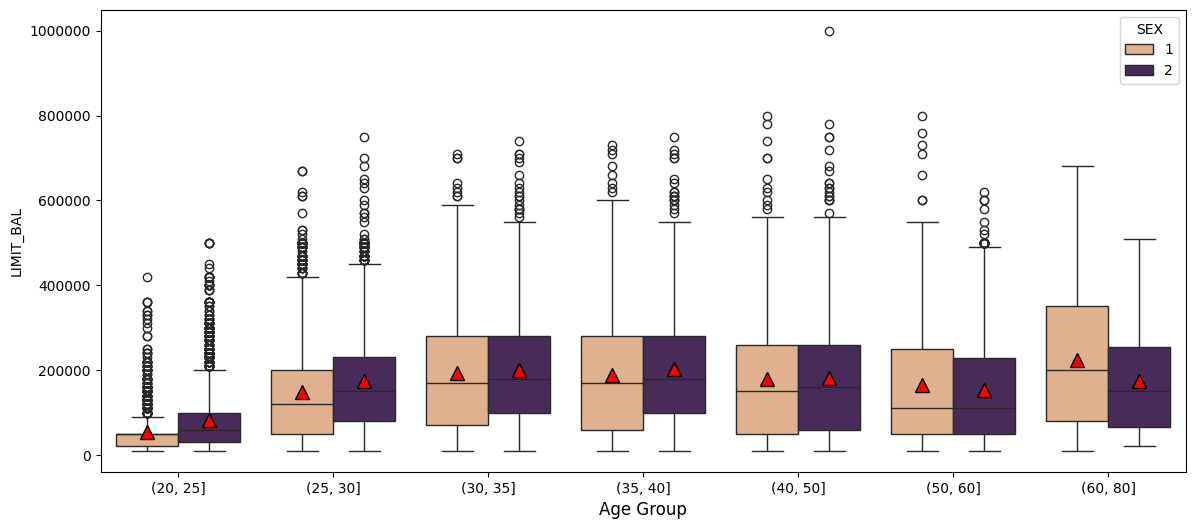

In [155]:
plt.figure(figsize=(14,6))

sns.boxplot(x = "AgeBin", y = "LIMIT_BAL", hue = 'SEX', data = data, palette = 'flare', order = AgeBin_order, showmeans=True, 
            meanprops={"markerfacecolor":"red",  "markeredgecolor":"black", "markersize":"10"})

plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation    
plt.xlabel("Age Group", fontsize= 12)

plt.show()

We saw earlier that the average given credit for women was slightly higher than for men. That still holds up for several combinations of categories, except among customers that:

    Have a grad school diploma;
    Are married;
    Are 50+ years old

Repayment Status (PAY_X)

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\1892166547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = 'Default', data=data, palette='rocket', errorbar= None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\1892166547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = 'Default', data=data, palette='rocket', errorbar= None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\1892166547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = 'Default', data=data, palette='rocket', er

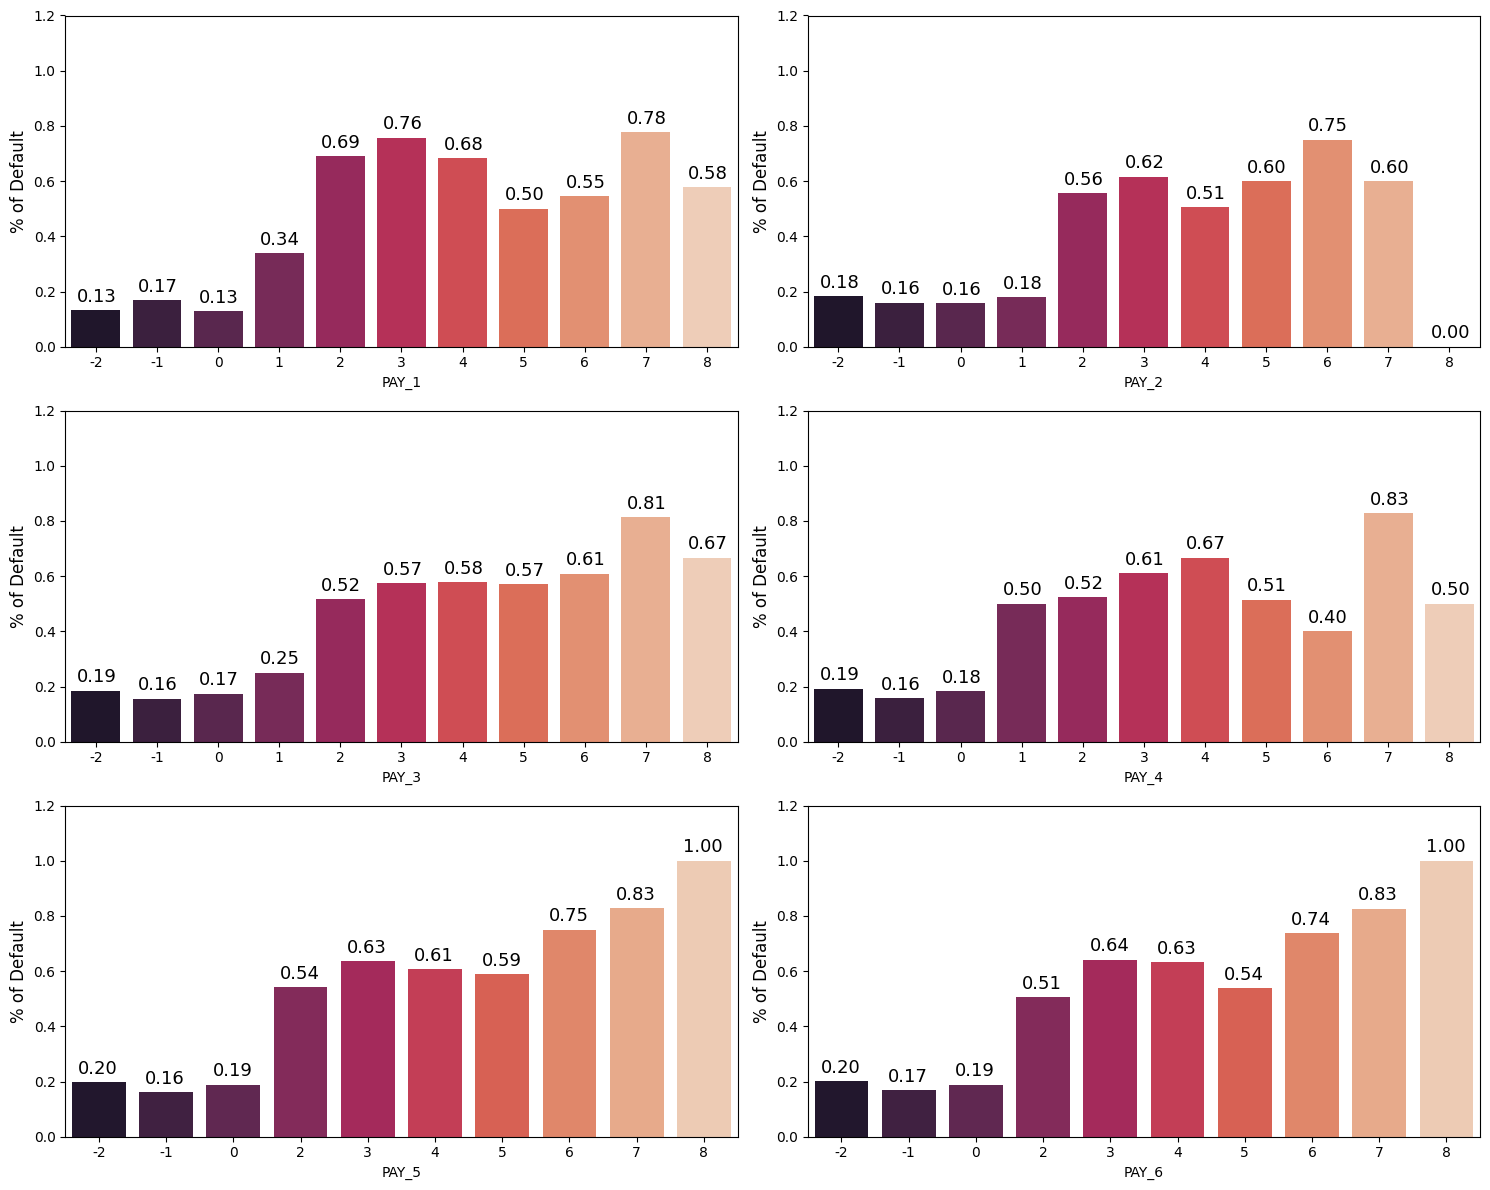

In [156]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i, col in enumerate(pay_x_fts):
    plt.subplot(3,2,i+1)
    ax = sns.barplot(x = col, y = 'Default', data=data, palette='rocket', errorbar= None)
    plt.ylabel('% of Default', fontsize = 12)
    plt.ylim(0, 1.2)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate('%.2f' %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03), fontsize = 13)

plt.show()

In [157]:
data['PAY_1_new'] = data['PAY_1'].copy()
data['PAY_2_new'] = data['PAY_2'].copy()
data['PAY_3_new'] = data['PAY_3'].copy()
data['PAY_4_new'] = data['PAY_4'].copy()
data['PAY_5_new'] = data['PAY_5'].copy()
data['PAY_6_new'] = data['PAY_6'].copy()

In [158]:
pay_x_new = ['PAY_1_new', 'PAY_2_new', 'PAY_3_new', 'PAY_4_new', 'PAY_5_new', 'PAY_6_new']

for col in pay_x_new:
    data.loc[:, col] = data.loc[:, col].replace(5,4)
    data.loc[:, col] = data.loc[:, col].replace(6,4)
    data.loc[:, col] = data.loc[:, col].replace(7,4)
    data.loc[:, col] = data.loc[:, col].replace(8,4)

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\181428207.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x = col, palette = 'rocket')
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\181428207.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x = col, palette = 'rocket')
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\181428207.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x = col, palette = 'rocket')
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\181428207.py:5: Futu

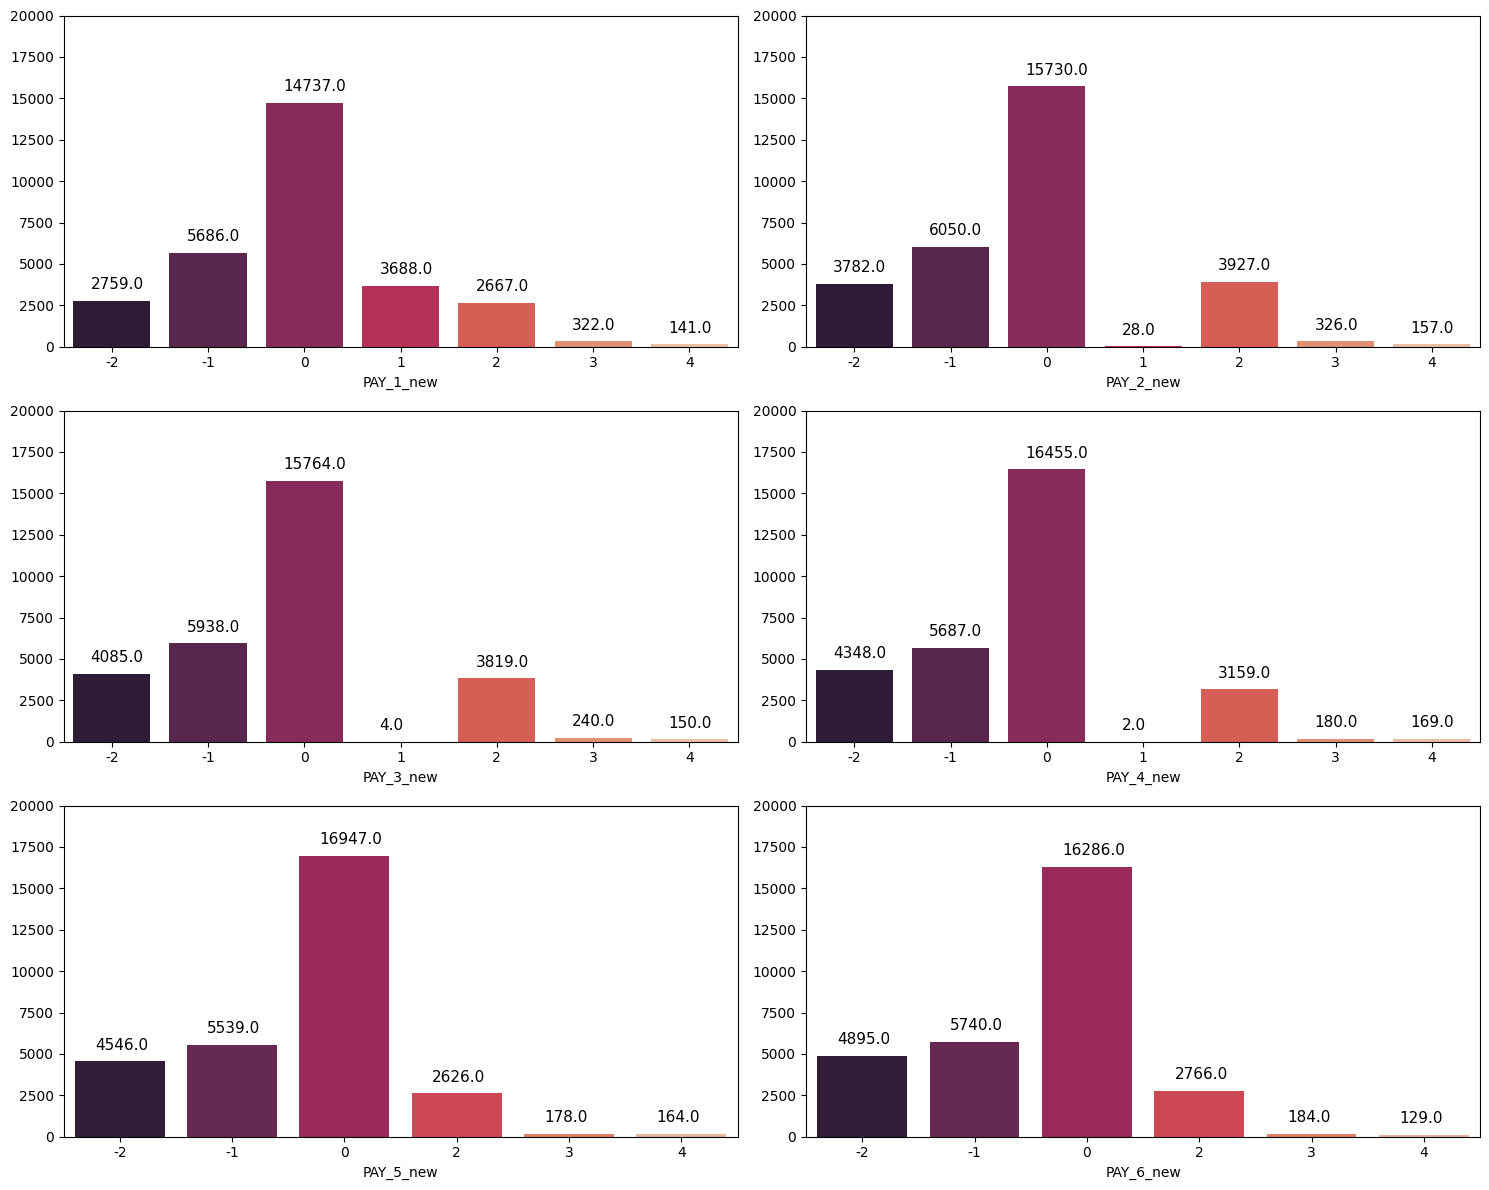

In [159]:
plt.figure(figsize = (15,12))

for i, col in enumerate(pay_x_new):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(data=data, x = col, palette = 'rocket')
    plt.ylim(0, 20000)
    plt.ylabel('')
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.180, p.get_height()+700), fontsize = 11)

plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\1706139269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = 'Default', data=data, palette = 'rocket', errorbar=None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\1706139269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = 'Default', data=data, palette = 'rocket', errorbar=None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\1706139269.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = 'Default', data=data, palette = 'rocket'

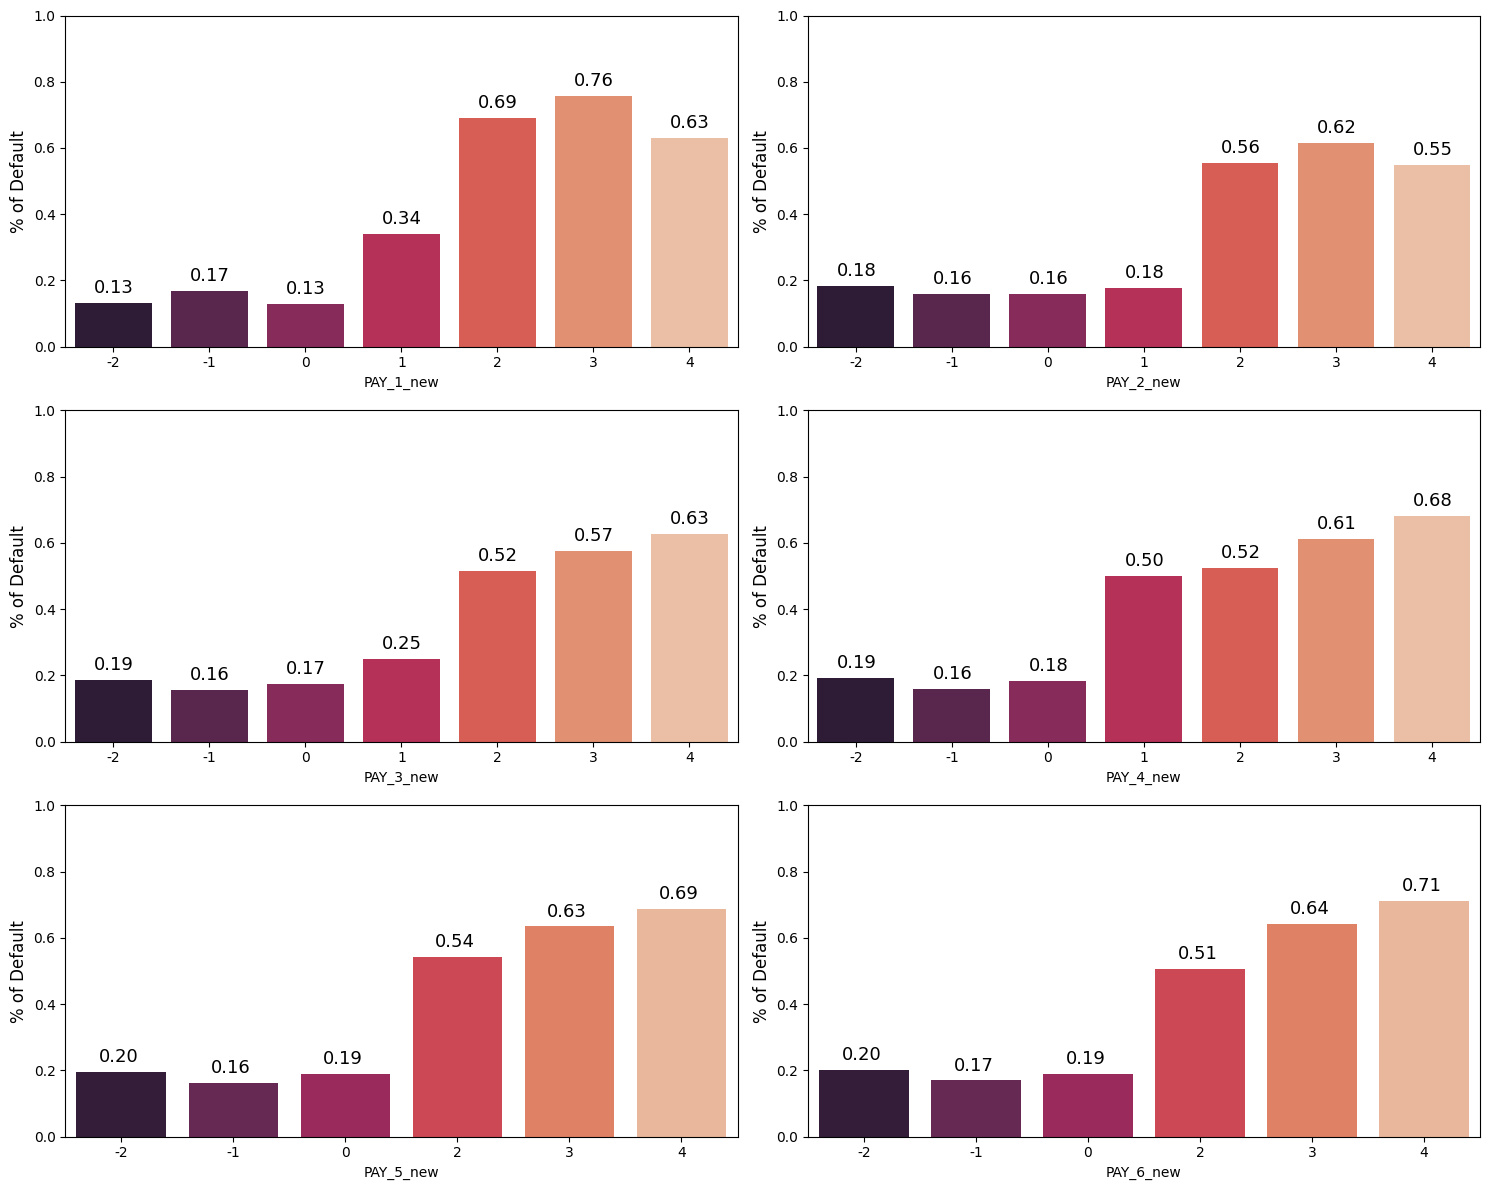

In [160]:
plt.figure(figsize=(15,12))

for i, col in enumerate(pay_x_new):
    plt.subplot(3,2,i+1)
    ax = sns.barplot(x = col, y = 'Default', data=data, palette = 'rocket', errorbar=None)
    plt.ylabel("% of Default", fontsize = 12)
    plt.ylim(0, 1.0)
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.20, p.get_height()+0.03), fontsize = 13)

plt.show()

Amount of Bill Statement and Previous Payment

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\1436592015.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, col])
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\1436592015.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, col])
C:\Users\harsh\AppData\Local\Temp\

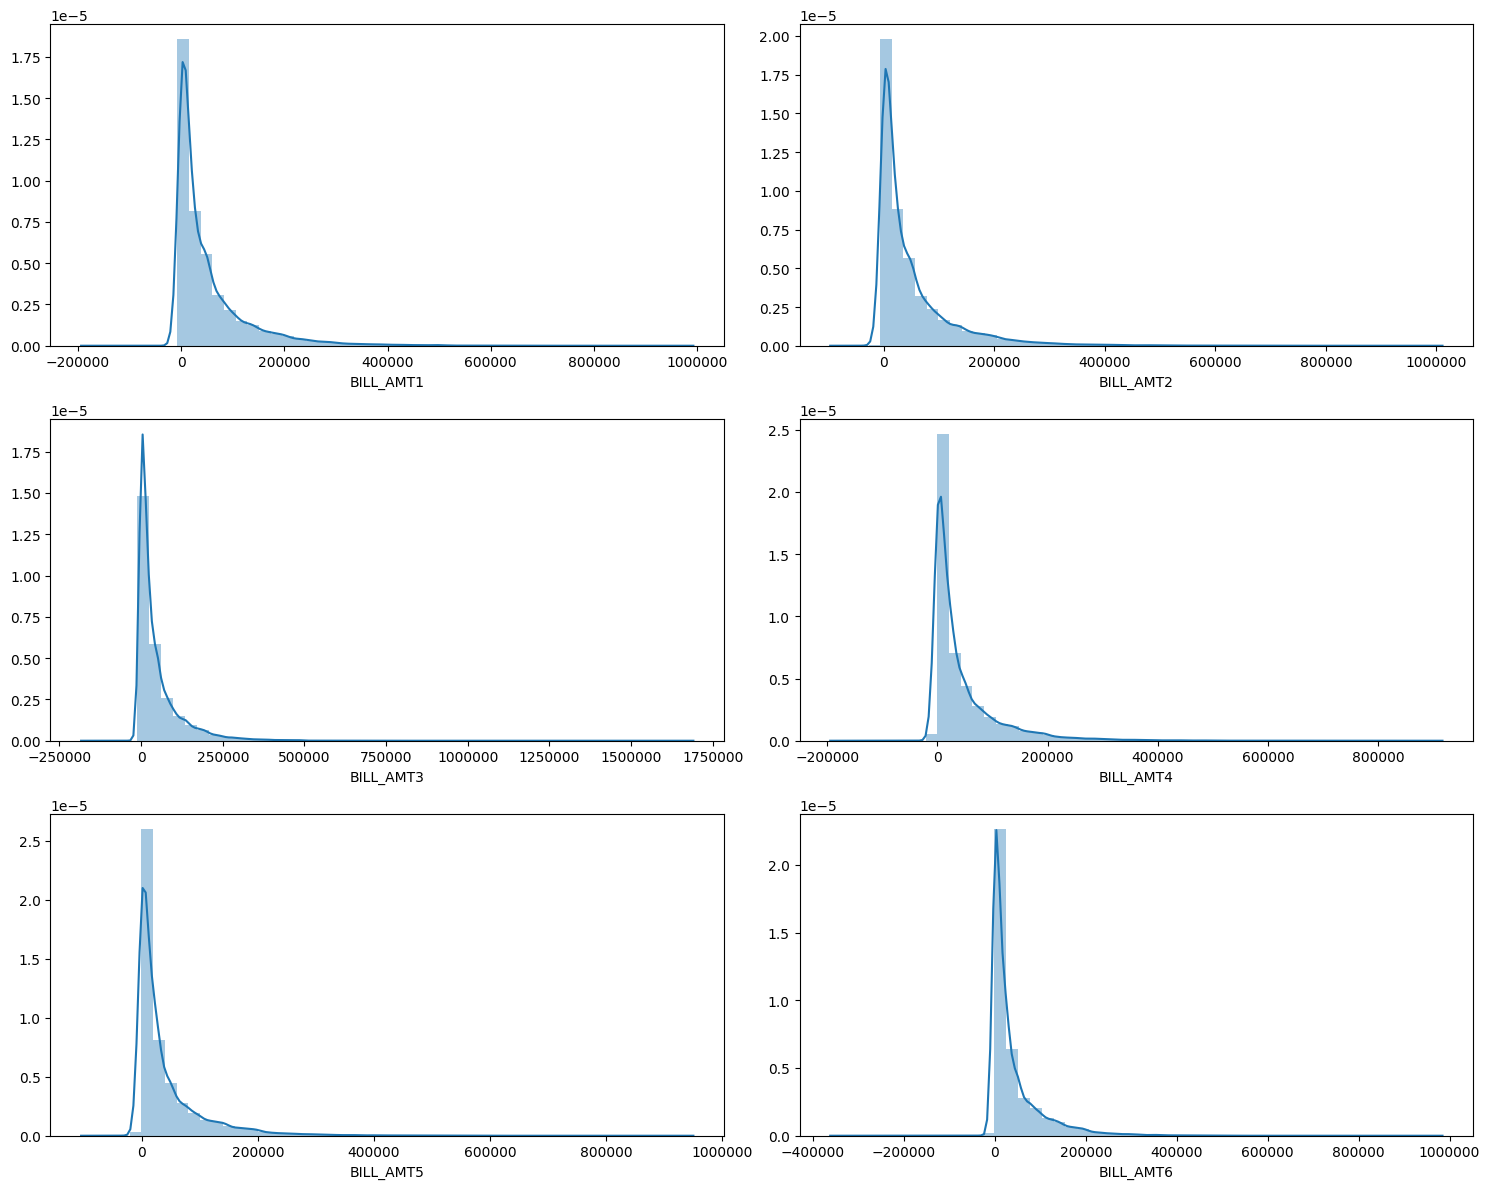

In [161]:
bill_amtx_fts = ['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

plt.figure(figsize=(15,12))

for i, col in enumerate(bill_amtx_fts):
    plt.subplot(3,2,i+1)
    sns.distplot(data.loc[:, col])
    plt.ticklabel_format(style='plain', axis='x')
    plt.ylabel('')
    plt.tight_layout()
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\3405910372.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Default']==0), col], label = 'No Default', shade = True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\3405910372.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Default']==1), col], label = 'Default', shade = True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\3405910372.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Default']==0), col], label = 'No Default', shade = True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\3405910372.py:6: Future

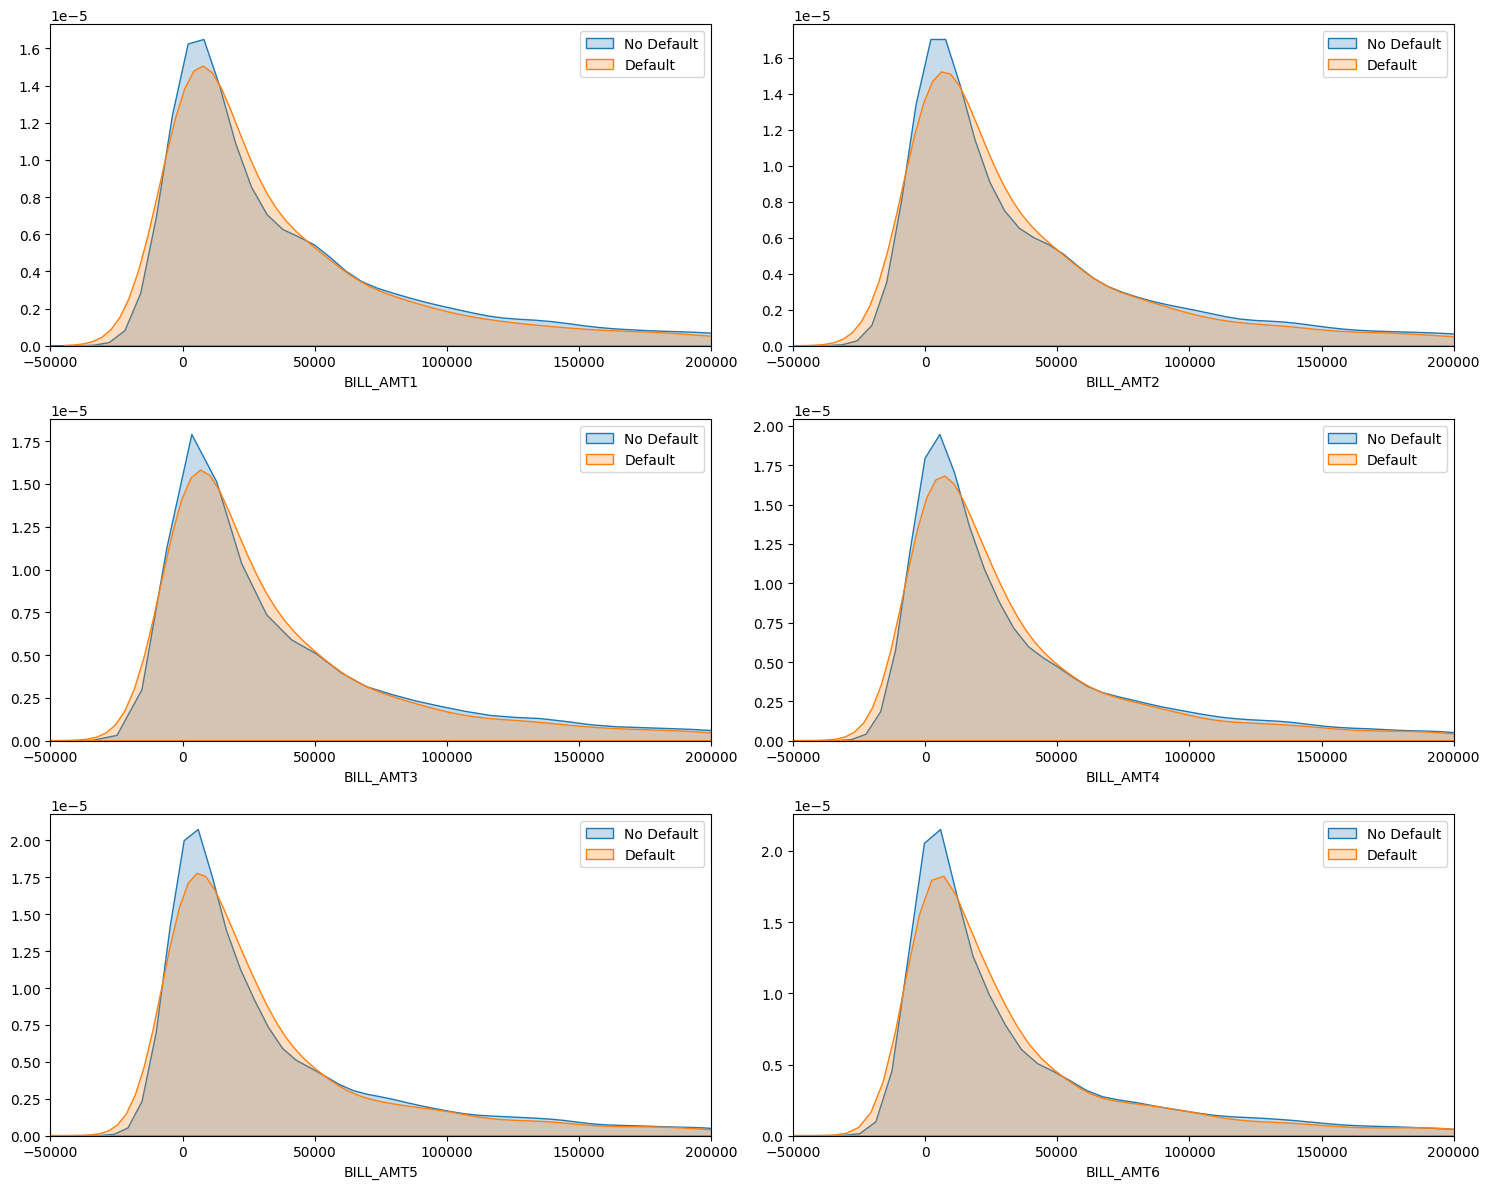

In [162]:
plt.figure(figsize=(15,12))

for i, col in enumerate(bill_amtx_fts):
    plt.subplot(3,2,i+1)
    sns.kdeplot(data.loc[(data['Default']==0), col], label = 'No Default', shade = True)
    sns.kdeplot(data.loc[(data['Default']==1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [163]:
data['BILL_AMT1_bin'] = data['BILL_AMT1'].copy()
data['BILL_AMT2_bin'] = data['BILL_AMT2'].copy()
data['BILL_AMT3_bin'] = data['BILL_AMT3'].copy()
data['BILL_AMT4_bin'] = data['BILL_AMT4'].copy()
data['BILL_AMT5_bin'] = data['BILL_AMT5'].copy()
data['BILL_AMT6_bin'] = data['BILL_AMT6'].copy()

In [164]:
bill_amtx_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

for i, col in enumerate (bill_amtx_bins):
    data[col] = pd.cut(data[bill_amtx_fts[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])
    print(data[col].value_counts())

BILL_AMT1_bin
(0, 25000]           12965
(25000, 75000]        7656
(75000, 200000]       5258
(-1, 0]               2008
(200000, 2000000]     1523
(-350000, -1]          590
Name: count, dtype: int64
BILL_AMT2_bin
(0, 25000]           12647
(25000, 75000]        7692
(75000, 200000]       5094
(-1, 0]               2506
(200000, 2000000]     1392
(-350000, -1]          669
Name: count, dtype: int64
BILL_AMT3_bin
(0, 25000]           12696
(25000, 75000]        7635
(75000, 200000]       4888
(-1, 0]               2870
(200000, 2000000]     1256
(-350000, -1]          655
Name: count, dtype: int64
BILL_AMT4_bin
(0, 25000]           13081
(25000, 75000]        7401
(75000, 200000]       4623
(-1, 0]               3195
(200000, 2000000]     1025
(-350000, -1]          675
Name: count, dtype: int64
BILL_AMT5_bin
(0, 25000]           13401
(25000, 75000]        7163
(75000, 200000]       4399
(-1, 0]               3506
(200000, 2000000]      876
(-350000, -1]          655
Name: count, dty

In [165]:
for col in bill_amtx_bins:
    print(data['Default'].groupby(data[col]).value_counts(normalize = True))

BILL_AMT1_bin      Default
(-350000, -1]      0          0.815254
                   1          0.184746
(-1, 0]            0          0.734064
                   1          0.265936
(0, 25000]         0          0.774470
                   1          0.225530
(25000, 75000]     0          0.775209
                   1          0.224791
(75000, 200000]    0          0.802396
                   1          0.197604
(200000, 2000000]  0          0.797111
                   1          0.202889
Name: proportion, dtype: float64
BILL_AMT2_bin      Default
(-350000, -1]      0          0.810164
                   1          0.189836
(-1, 0]            0          0.753791
                   1          0.246209
(0, 25000]         0          0.775836
                   1          0.224164
(25000, 75000]     0          0.773531
                   1          0.226469
(75000, 200000]    0          0.799176
                   1          0.200824
(200000, 2000000]  0          0.790230
                

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2016276311.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data['Default'].groupby(data[col]).value_counts(normalize = True))
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2016276311.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data['Default'].groupby(data[col]).value_counts(normalize = True))
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2016276311.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=

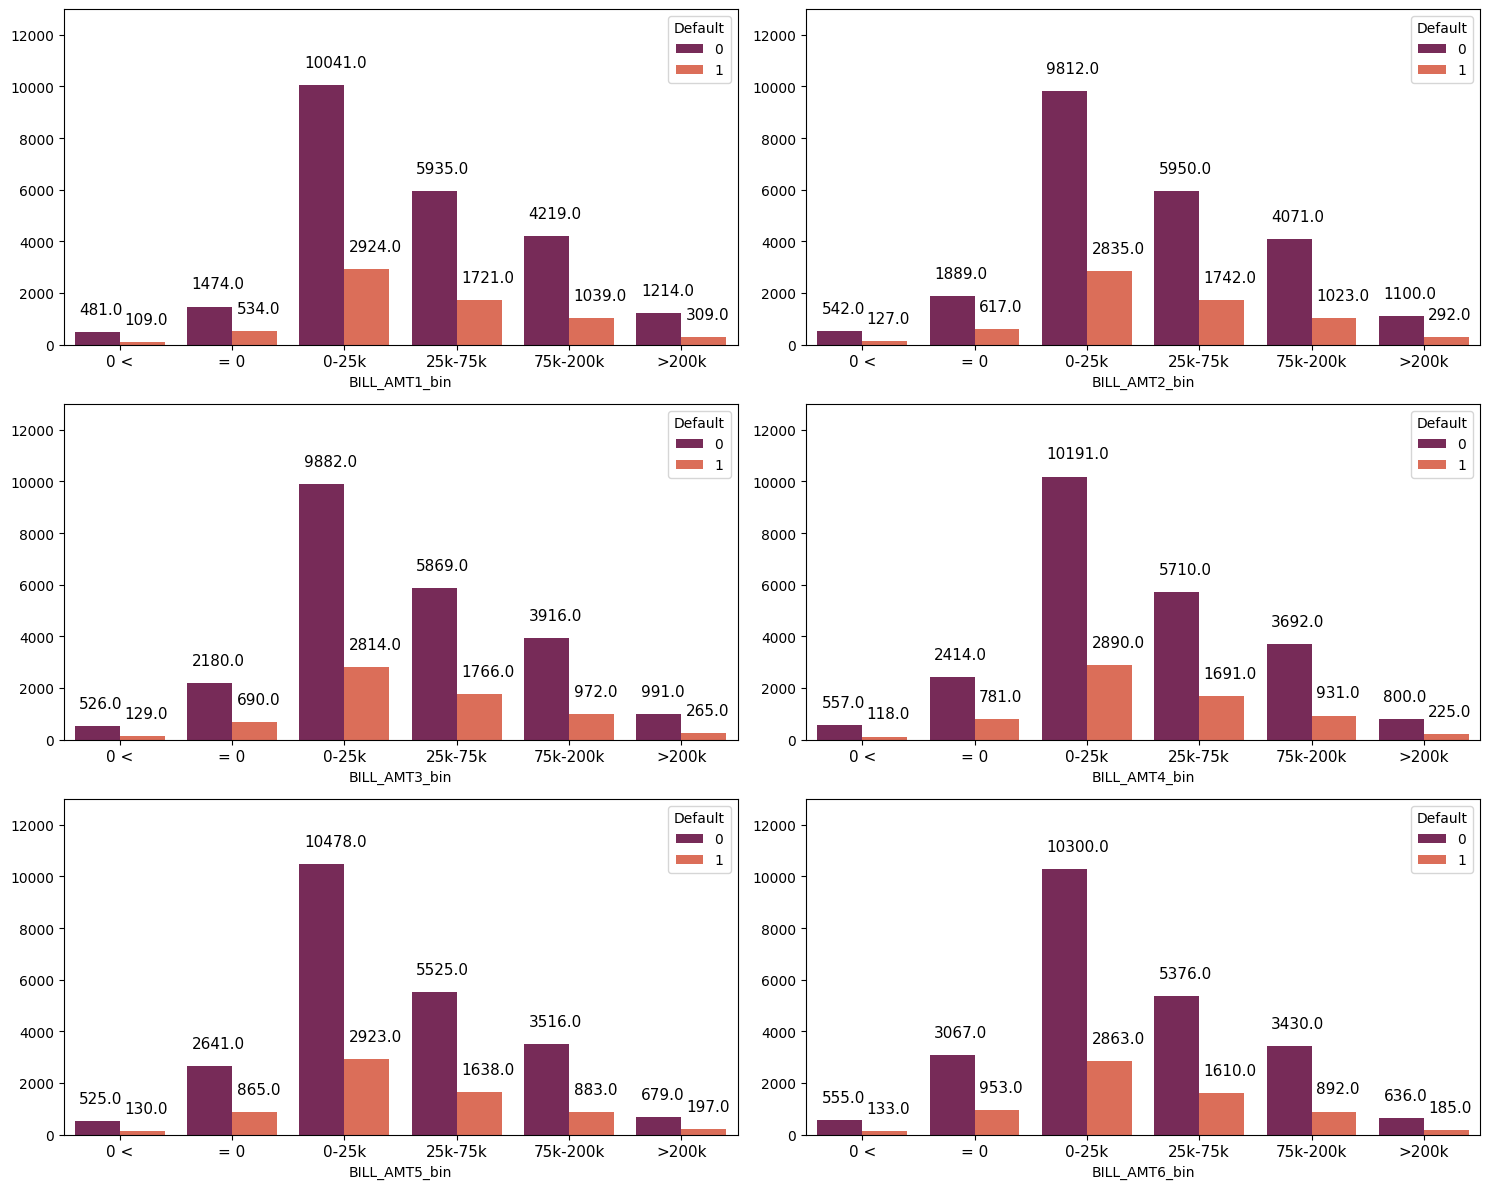

In [166]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = data, x = col, hue="Default", palette = 'rocket')
    plt.ylim(0,13000)
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate((height), (p.get_x()+0.04, height+700), fontsize = 11)    
        
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\3927529162.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Default", data = data, palette = 'rocket', ci = None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\3927529162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = "Default", data = data, palette = 'rocket', ci = None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\3927529162.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Default", data = data, palette = 'rocket', ci = None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\3927529162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

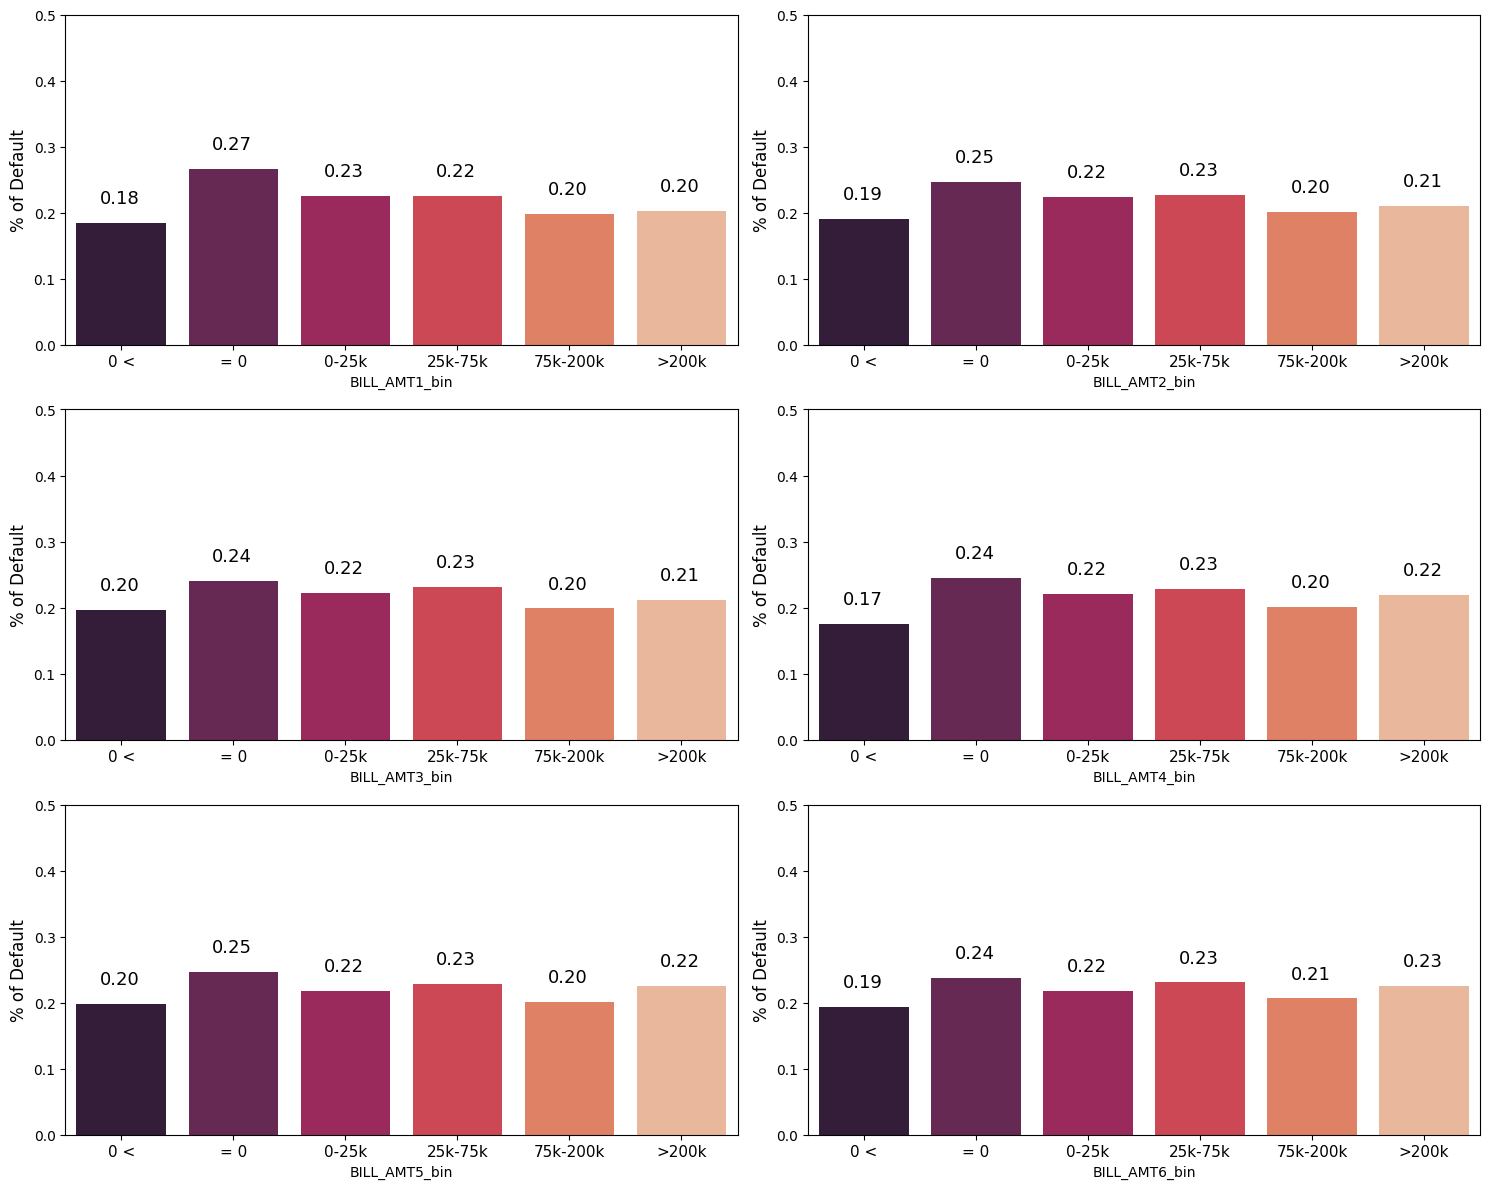

In [167]:
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = data, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.21, p.get_height()+0.03),fontsize=13)

plt.show()

those who have a negative bill statement have a lower chance of default than the rest. What stands out is that there is a little higher chance of default for those who didn’t have a bill in the previous months.

### Amount of Previous Payment (PAY_AMTX)


C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\50965356.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:,col])
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\50965356.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:,col])
C:\Users\harsh\AppData\Local\Temp\ipyker

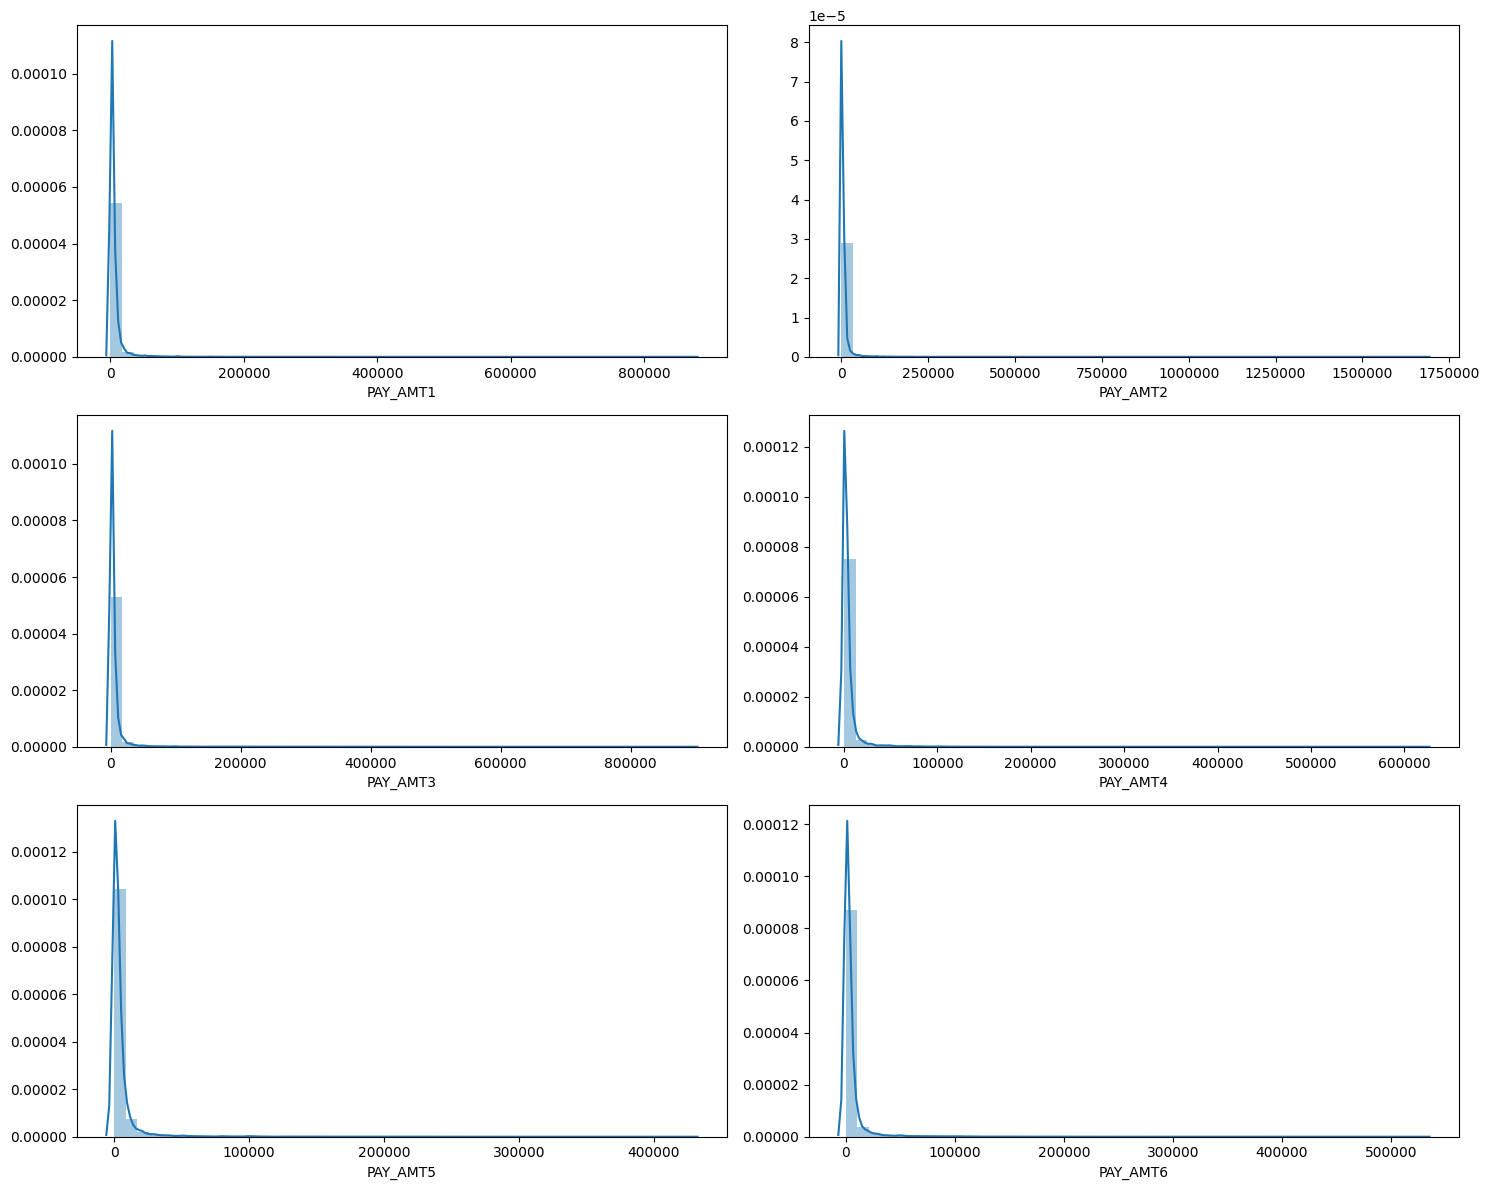

In [168]:
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)
    sns.distplot(data.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation
    plt.ylabel('')
    plt.tight_layout()

plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2845325618.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Default'] == 0), col], label = 'No Default', shade = True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2845325618.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Default'] == 1), col], label = 'Default', shade = True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2845325618.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Default'] == 0), col], label = 'No Default', shade = True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2845325618.py:6: 

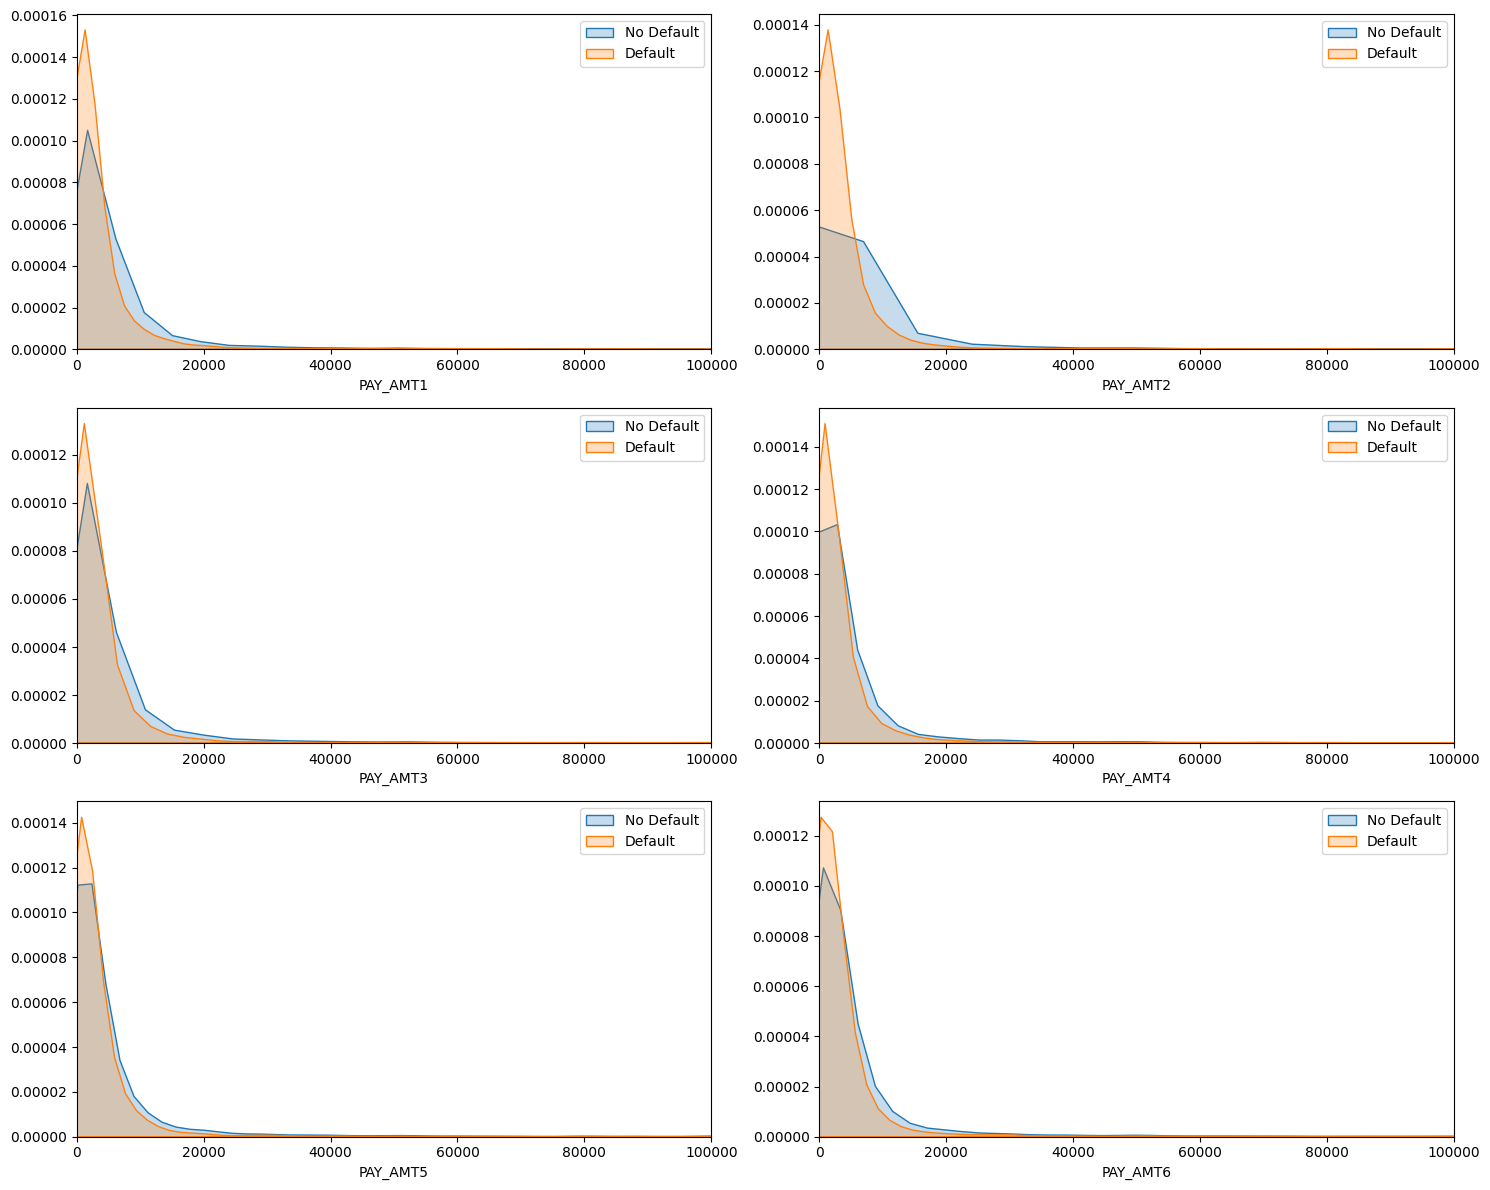

In [169]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_fts):    
    plt.subplot(3,2,i + 1)    
    sns.kdeplot(data.loc[(data['Default'] == 0), col], label = 'No Default', shade = True)
    sns.kdeplot(data.loc[(data['Default'] == 1), col], label = 'Default', shade = True)
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

In [170]:
data['PAY_AMT1_bin'] = data['PAY_AMT1'].copy()
data['PAY_AMT2_bin'] = data['PAY_AMT2'].copy()
data['PAY_AMT3_bin'] = data['PAY_AMT3'].copy()
data['PAY_AMT4_bin'] = data['PAY_AMT4'].copy()
data['PAY_AMT5_bin'] = data['PAY_AMT5'].copy()
data['PAY_AMT6_bin'] = data['PAY_AMT6'].copy()

In [171]:
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']

for i, col in enumerate (pay_amtx_bins):
    data[col] = pd.cut(data[pay_amtx_fts[i]],[-1, 0, 25000, 50000, 100000, 2000000])
    print(data[col].value_counts())

PAY_AMT1_bin
(0, 25000]           23730
(-1, 0]               5249
(25000, 50000]         550
(50000, 100000]        322
(100000, 2000000]      149
Name: count, dtype: int64
PAY_AMT2_bin
(0, 25000]           23569
(-1, 0]               5396
(25000, 50000]         556
(50000, 100000]        283
(100000, 2000000]      196
Name: count, dtype: int64
PAY_AMT3_bin
(0, 25000]           23068
(-1, 0]               5968
(25000, 50000]         514
(50000, 100000]        273
(100000, 2000000]      177
Name: count, dtype: int64
PAY_AMT4_bin
(0, 25000]           22641
(-1, 0]               6408
(25000, 50000]         533
(50000, 100000]        271
(100000, 2000000]      147
Name: count, dtype: int64
PAY_AMT5_bin
(0, 25000]           22382
(-1, 0]               6703
(25000, 50000]         493
(50000, 100000]        268
(100000, 2000000]      154
Name: count, dtype: int64
PAY_AMT6_bin
(0, 25000]           21785
(-1, 0]               7173
(25000, 50000]         517
(50000, 100000]        300
(100000, 

In [172]:
for col in pay_amtx_bins:
    print(data['Default'].groupby(data[col]).value_counts(normalize = True))

PAY_AMT1_bin       Default
(-1, 0]            0          0.640503
                   1          0.359497
(0, 25000]         0          0.803582
                   1          0.196418
(25000, 50000]     0          0.910909
                   1          0.089091
(50000, 100000]    0          0.919255
                   1          0.080745
(100000, 2000000]  0          0.912752
                   1          0.087248
Name: proportion, dtype: float64
PAY_AMT2_bin       Default
(-1, 0]            0          0.666605
                   1          0.333395
(0, 25000]         0          0.797997
                   1          0.202003
(25000, 50000]     0          0.926259
                   1          0.073741
(50000, 100000]    0          0.936396
                   1          0.063604
(100000, 2000000]  0          0.913265
                   1          0.086735
Name: proportion, dtype: float64
PAY_AMT3_bin       Default
(-1, 0]            0          0.676441
                   1          0.32

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2463427498.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data['Default'].groupby(data[col]).value_counts(normalize = True))
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2463427498.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data['Default'].groupby(data[col]).value_counts(normalize = True))
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2463427498.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=

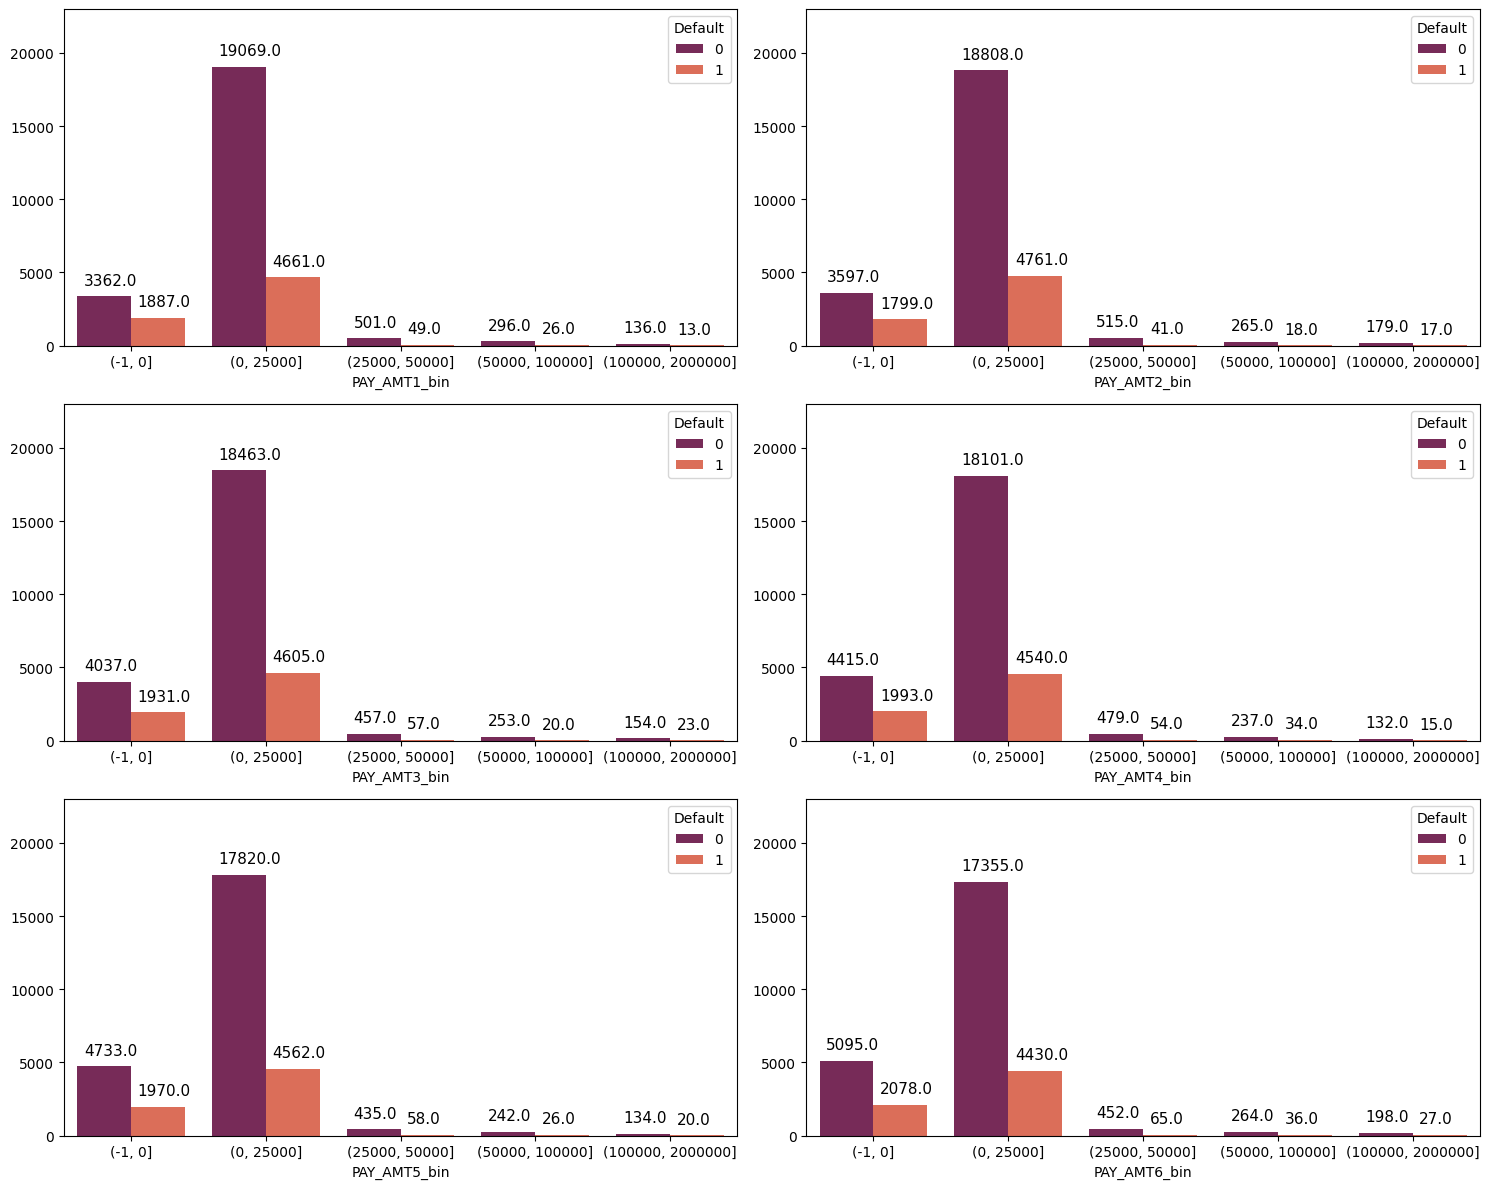

In [173]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = data, x = col, hue="Default", palette = 'rocket')
    plt.ylim(0,23000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate((height), (p.get_x()+0.05, height+800), fontsize=11)    

plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2561312534.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Default", data = data, palette = 'rocket', ci = None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2561312534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = col, y = "Default", data = data, palette = 'rocket', ci = None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2561312534.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = col, y = "Default", data = data, palette = 'rocket', ci = None)
C:\Users\harsh\AppData\Local\Temp\ipykernel_16564\2561312534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

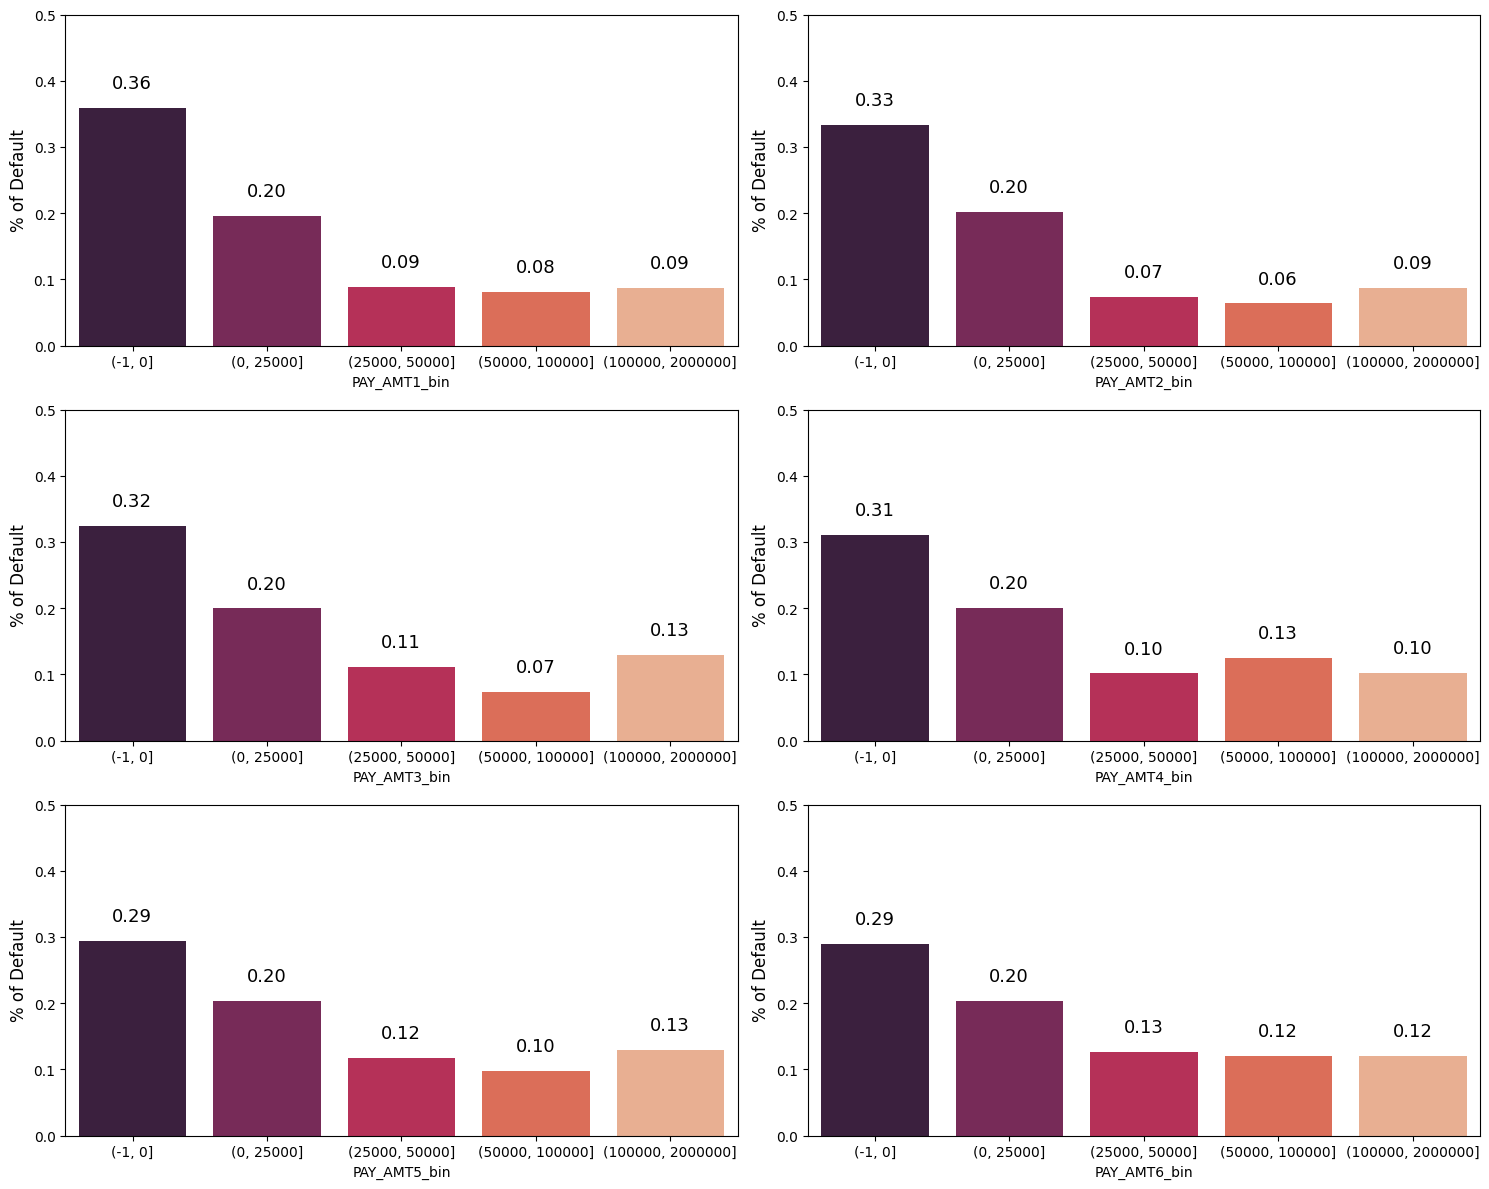

In [174]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = data, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

There are no surprises in this group of features. There is a higher default rate among those who paid nothing in previous months and lower rates among those paid over 25k of NT dollars.

In [175]:
X1 = data.copy().drop(['Default','ID'], axis=1)
y = data['Default']

In [176]:
X1.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3_bin,BILL_AMT4_bin,BILL_AMT5_bin,BILL_AMT6_bin,PAY_AMT1_bin,PAY_AMT2_bin,PAY_AMT3_bin,PAY_AMT4_bin,PAY_AMT5_bin,PAY_AMT6_bin
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,"(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(-1, 0]"
1,120000.0,2,2,2,26,-1,2,0,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]"
2,90000.0,2,2,2,34,0,0,0,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
3,50000.0,2,2,1,37,0,0,0,0,0,...,"(25000, 75000]","(25000, 75000]","(25000, 75000]","(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,"(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
5,50000.0,1,1,2,37,0,0,0,0,0,...,"(25000, 75000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
6,500000.0,1,1,2,29,0,0,0,0,0,...,"(200000, 2000000]","(200000, 2000000]","(200000, 2000000]","(200000, 2000000]","(50000, 100000]","(25000, 50000]","(25000, 50000]","(0, 25000]","(0, 25000]","(0, 25000]"
7,100000.0,2,2,2,23,0,-1,-1,0,0,...,"(0, 25000]","(0, 25000]","(-350000, -1]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]"
8,140000.0,2,3,1,28,0,0,2,0,0,...,"(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]","(-1, 0]","(0, 25000]","(0, 25000]","(0, 25000]","(0, 25000]"
9,20000.0,1,3,2,35,-2,-2,-2,-2,-1,...,"(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(-1, 0]","(-1, 0]","(-1, 0]","(0, 25000]","(0, 25000]","(-1, 0]"


In [177]:
X1['PAY_1'].value_counts()

PAY_1
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

In [178]:
X_base = X1.copy().drop(pay_x_new, axis = 1)
X_base = X_base.drop(bill_amtx_bins, axis = 1)
X_base = X_base.drop(pay_amtx_bins, axis = 1)
X_base = X_base.drop(['AgeBin', 'LimitBin'], axis = 1)
X_base

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [179]:
X_base.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [180]:
X=X_base
y=data['Default']

In [181]:
df_final= pd.concat([X, y], axis=1)

In [182]:
df_final

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [183]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [184]:
df_final.to_csv('Raw_data.csv')

In [185]:
raw_data = pd.read_csv('Raw_data.csv')

In [186]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30000 non-null  int64  
 1   LIMIT_BAL   30000 non-null  float64
 2   SEX         30000 non-null  int64  
 3   EDUCATION   30000 non-null  int64  
 4   MARRIAGE    30000 non-null  int64  
 5   AGE         30000 non-null  int64  
 6   PAY_1       30000 non-null  int64  
 7   PAY_2       30000 non-null  int64  
 8   PAY_3       30000 non-null  int64  
 9   PAY_4       30000 non-null  int64  
 10  PAY_5       30000 non-null  int64  
 11  PAY_6       30000 non-null  int64  
 12  BILL_AMT1   30000 non-null  float64
 13  BILL_AMT2   30000 non-null  float64
 14  BILL_AMT3   30000 non-null  float64
 15  BILL_AMT4   30000 non-null  float64
 16  BILL_AMT5   30000 non-null  float64
 17  BILL_AMT6   30000 non-null  float64
 18  PAY_AMT1    30000 non-null  float64
 19  PAY_AMT2    30000 non-nul

In [187]:
raw_data['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [188]:
raw_data['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [189]:
raw_data.groupby(['PAY_1'])['Default'].value_counts()

PAY_1  Default
-2     0           2394
       1            365
-1     0           4732
       1            954
 0     0          12849
       1           1888
 1     0           2436
       1           1252
 2     1           1844
       0            823
 3     1            244
       0             78
 4     1             52
       0             24
 5     0             13
       1             13
 6     1              6
       0              5
 7     1              7
       0              2
 8     1             11
       0              8
Name: count, dtype: int64

In [190]:
raw_data.drop('Unnamed: 0', axis=1, inplace=True)

In [191]:
raw_data.duplicated().value_counts()

False    29965
True        35
Name: count, dtype: int64

In [192]:
raw_data = raw_data.drop_duplicates()

In [193]:
raw_data.shape

(29965, 24)

In [194]:
raw_data.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [198]:
raw_data.shape

(29965, 24)

In [203]:
pay_x_new = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in pay_x_new:  
    raw_data.loc[:,col] = raw_data.loc[:,col].replace(-2,0)

In [204]:
raw_data.groupby(['PAY_3'])['Default'].value_counts()

PAY_3  Default
-1     0           5008
       1            926
 0     0          16316
       1           3503
 1     0              3
       1              1
 2     1           1969
       0           1850
 3     1            138
       0            102
 4     1             43
       0             32
 5     1             12
       0              9
 6     1             14
       0              9
 7     1             22
       0              5
 8     1              2
       0              1
Name: count, dtype: int64

In [205]:
import imblearn
from imblearn.over_sampling import SMOTE

In [206]:
smote = SMOTE()

X_smote, y_smote = smote.fit_resample(raw_data.iloc[:,0:-1],raw_data['Default'])

print('Original dataset shape', len(raw_data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29965
Resampled dataset shape 46670


In [207]:
X_smote

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.000000,2,2,1,24,2,2,-1,-1,0,...,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,120000.000000,2,2,2,26,-1,2,0,0,0,...,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,90000.000000,2,2,2,34,0,0,0,0,0,...,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,50000.000000,2,2,1,37,0,0,0,0,0,...,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,50000.000000,1,2,1,57,-1,0,-1,0,0,...,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46665,180000.000000,2,2,1,34,1,2,2,0,0,...,103975.671632,104875.238866,101031.565824,103869.913369,2165.655956,3386.256392,3761.185343,2255.740472,5199.976519,2441.350851
46666,360000.000000,1,1,2,35,0,0,0,0,0,...,8880.614470,14225.039819,10893.804209,1283.014480,1871.207268,6337.109085,10586.661100,137.671446,1283.014480,784.546017
46667,360000.000000,2,1,1,41,0,0,0,0,0,...,7890.281420,9691.966168,8031.990182,12980.607008,11481.174033,4757.053960,6762.962564,4477.520276,9986.412339,14926.910409
46668,148495.956797,1,1,1,33,1,2,2,2,0,...,91640.270640,88792.156893,89915.670634,94400.564409,752.021601,6888.625311,0.000000,3254.878704,7134.311058,400.075492


In [208]:
y_smote

0        1
1        1
2        0
3        0
4        0
        ..
46665    1
46666    1
46667    1
46668    1
46669    1
Name: Default, Length: 46670, dtype: int64

In [209]:
columns = list(raw_data.columns)

In [210]:
columns.pop()

'Default'

In [211]:
columns

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [212]:
balance_df = X_smote

In [213]:
balance_df['Default'] = y_smote

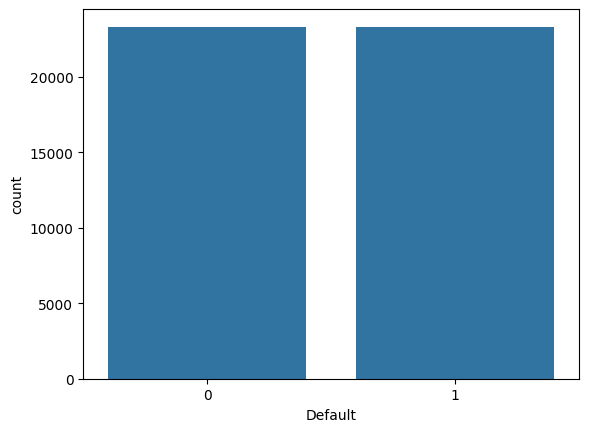

In [214]:
sns.countplot(x = 'Default', data=balance_df)
plt.show()

## Feature Engineering

In [215]:
df_fr = balance_df.copy()

In [216]:
df_fr['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [218]:
df_fr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.000000,2,2,1,24,2,2,-1,-1,0,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.000000,2,2,2,26,-1,2,0,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.000000,2,2,2,34,0,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.000000,2,2,1,37,0,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.000000,1,2,1,57,-1,0,-1,0,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46665,180000.000000,2,2,1,34,1,2,2,0,0,...,104875.238866,101031.565824,103869.913369,2165.655956,3386.256392,3761.185343,2255.740472,5199.976519,2441.350851,1
46666,360000.000000,1,1,2,35,0,0,0,0,0,...,14225.039819,10893.804209,1283.014480,1871.207268,6337.109085,10586.661100,137.671446,1283.014480,784.546017,1
46667,360000.000000,2,1,1,41,0,0,0,0,0,...,9691.966168,8031.990182,12980.607008,11481.174033,4757.053960,6762.962564,4477.520276,9986.412339,14926.910409,1
46668,148495.956797,1,1,1,33,1,2,2,2,0,...,88792.156893,89915.670634,94400.564409,752.021601,6888.625311,0.000000,3254.878704,7134.311058,400.075492,1


In [219]:
df_fr['MARRIAGE'].value_counts()

MARRIAGE
1    25630
2    20661
3      379
Name: count, dtype: int64

In [220]:
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46670 entries, 0 to 46669
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  46670 non-null  float64
 1   SEX        46670 non-null  int64  
 2   EDUCATION  46670 non-null  int64  
 3   MARRIAGE   46670 non-null  int64  
 4   AGE        46670 non-null  int64  
 5   PAY_1      46670 non-null  int64  
 6   PAY_2      46670 non-null  int64  
 7   PAY_3      46670 non-null  int64  
 8   PAY_4      46670 non-null  int64  
 9   PAY_5      46670 non-null  int64  
 10  PAY_6      46670 non-null  int64  
 11  BILL_AMT1  46670 non-null  float64
 12  BILL_AMT2  46670 non-null  float64
 13  BILL_AMT3  46670 non-null  float64
 14  BILL_AMT4  46670 non-null  float64
 15  BILL_AMT5  46670 non-null  float64
 16  BILL_AMT6  46670 non-null  float64
 17  PAY_AMT1   46670 non-null  float64
 18  PAY_AMT2   46670 non-null  float64
 19  PAY_AMT3   46670 non-null  float64
 20  PAY_AM

In [221]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'Grade_School', 2 : 'University', 3 : 'High_School', 4 : 'Others'}, 'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)

In [222]:
df_fr = pd.get_dummies(df_fr,columns=['EDUCATION','MARRIAGE'])

In [223]:
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46670 entries, 0 to 46669
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LIMIT_BAL               46670 non-null  float64
 1   SEX                     46670 non-null  object 
 2   AGE                     46670 non-null  int64  
 3   PAY_1                   46670 non-null  int64  
 4   PAY_2                   46670 non-null  int64  
 5   PAY_3                   46670 non-null  int64  
 6   PAY_4                   46670 non-null  int64  
 7   PAY_5                   46670 non-null  int64  
 8   PAY_6                   46670 non-null  int64  
 9   BILL_AMT1               46670 non-null  float64
 10  BILL_AMT2               46670 non-null  float64
 11  BILL_AMT3               46670 non-null  float64
 12  BILL_AMT4               46670 non-null  float64
 13  BILL_AMT5               46670 non-null  float64
 14  BILL_AMT6               46670 non-null

In [227]:
encoders_nums = {
    "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [228]:
removed_column = df_fr.pop('Default')
df_fr['Default'] = removed_column

In [229]:
df_fr.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,EDUCATION_Grade_School,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,Default
0,20000.0,0,24,2,2,-1,-1,0,0,3913.0,...,0.0,0.0,False,False,False,True,True,False,False,1
1,120000.0,0,26,-1,2,0,0,0,2,2682.0,...,0.0,2000.0,False,False,False,True,False,False,True,1
2,90000.0,0,34,0,0,0,0,0,0,29239.0,...,1000.0,5000.0,False,False,False,True,False,False,True,0
3,50000.0,0,37,0,0,0,0,0,0,46990.0,...,1069.0,1000.0,False,False,False,True,True,False,False,0
4,50000.0,1,57,-1,0,-1,0,0,0,8617.0,...,689.0,679.0,False,False,False,True,True,False,False,0


In [230]:
df_fr_col = df_fr.columns
df_fr_col

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_Grade_School',
       'EDUCATION_High_School', 'EDUCATION_Others', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Others', 'MARRIAGE_Single', 'Default'],
      dtype='object')

In [231]:
df_fr.to_csv('Final_df.csv')

In [232]:
df_fr = pd.read_csv('./Final_df.csv')

In [233]:
df_fr.head(10)

,Unnamed: 0,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,EDUCATION_Grade_School,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,Default
0,0,20000.0,0,24,2,2,-1,-1,0,0,...,0.0,0.0,False,False,False,True,True,False,False,1
1,1,120000.0,0,26,-1,2,0,0,0,2,...,0.0,2000.0,False,False,False,True,False,False,True,1
2,2,90000.0,0,34,0,0,0,0,0,0,...,1000.0,5000.0,False,False,False,True,False,False,True,0
3,3,50000.0,0,37,0,0,0,0,0,0,...,1069.0,1000.0,False,False,False,True,True,False,False,0
4,4,50000.0,1,57,-1,0,-1,0,0,0,...,689.0,679.0,False,False,False,True,True,False,False,0
5,5,50000.0,1,37,0,0,0,0,0,0,...,1000.0,800.0,True,False,False,False,False,False,True,0
6,6,500000.0,1,29,0,0,0,0,0,0,...,13750.0,13770.0,True,False,False,False,False,False,True,0
7,7,100000.0,0,23,0,-1,-1,0,0,-1,...,1687.0,1542.0,False,False,False,True,False,False,True,0
8,8,140000.0,0,28,0,0,2,0,0,0,...,1000.0,1000.0,False,True,False,False,True,False,False,0
9,9,20000.0,1,35,0,0,0,0,-1,-1,...,1122.0,0.0,False,True,False,False,False,False,True,0


In [234]:
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46670 entries, 0 to 46669
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              46670 non-null  int64  
 1   LIMIT_BAL               46670 non-null  float64
 2   SEX                     46670 non-null  int64  
 3   AGE                     46670 non-null  int64  
 4   PAY_1                   46670 non-null  int64  
 5   PAY_2                   46670 non-null  int64  
 6   PAY_3                   46670 non-null  int64  
 7   PAY_4                   46670 non-null  int64  
 8   PAY_5                   46670 non-null  int64  
 9   PAY_6                   46670 non-null  int64  
 10  BILL_AMT1               46670 non-null  float64
 11  BILL_AMT2               46670 non-null  float64
 12  BILL_AMT3               46670 non-null  float64
 13  BILL_AMT4               46670 non-null  float64
 14  BILL_AMT5               46670 non-null

In [235]:
df_fr.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [236]:
df_fr

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,EDUCATION_Grade_School,EDUCATION_High_School,EDUCATION_Others,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Others,MARRIAGE_Single,Default
0,20000.000000,0,24,2,2,-1,-1,0,0,3913.000000,...,0.000000,0.000000,False,False,False,True,True,False,False,1
1,120000.000000,0,26,-1,2,0,0,0,2,2682.000000,...,0.000000,2000.000000,False,False,False,True,False,False,True,1
2,90000.000000,0,34,0,0,0,0,0,0,29239.000000,...,1000.000000,5000.000000,False,False,False,True,False,False,True,0
3,50000.000000,0,37,0,0,0,0,0,0,46990.000000,...,1069.000000,1000.000000,False,False,False,True,True,False,False,0
4,50000.000000,1,57,-1,0,-1,0,0,0,8617.000000,...,689.000000,679.000000,False,False,False,True,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46665,180000.000000,0,34,1,2,2,0,0,0,103449.414729,...,5199.976519,2441.350851,False,False,False,True,True,False,False,1
46666,360000.000000,1,35,0,0,0,0,0,0,5063.053973,...,1283.014480,784.546017,True,False,False,False,False,False,True,1
46667,360000.000000,0,41,0,0,0,0,0,0,7900.444611,...,9986.412339,14926.910409,True,False,False,False,True,False,False,1
46668,148495.956797,1,33,1,2,2,2,0,0,88740.705129,...,7134.311058,400.075492,True,False,False,False,True,False,False,1


### Implementing Logistic Regression

In [237]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline

In [238]:
df_log = df_fr.copy()

In [239]:
X = df_log.drop(['Default'], axis= 1)
y = df_log['Default']

In [240]:
columns = X.columns

In [241]:
columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_Grade_School',
       'EDUCATION_High_School', 'EDUCATION_Others', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Others', 'MARRIAGE_Single'],
      dtype='object')

In [242]:
from sklearn.preprocessing import StandardScaler

In [243]:
X = StandardScaler().fit_transform(X)

### Principal Component Analysis (PCA) 

In [244]:
# from sklearn.decomposition import PCA
# import numpy as np
# pca = PCA()
# pca.fit(X)

# # Obtain the explained variance ratio for each principal component
# explained_variance_ratio = pca.explained_variance_ratio_

# # Calculate the cumulative explained variance ratio
# cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# # Determine the number of principal components needed to capture a certain percentage of variance
# desired_variance = 0.95  # Example: capturing 95% of the variance
# n_components_needed = np.argmax(cumulative_variance_ratio >= desired_variance) + 1

# print("Number of Principal Components needed to capture", 
#       "{:.0%}".format(desired_variance), "of the variance:", n_components_needed)

# # You can also print the explained variance ratio for each component
# print("Explained Variance Ratio for each Principal Component:")
# print(explained_variance_ratio)

# # Print the cumulative explained variance ratio
# print("Cumulative Explained Variance Ratio:")
# print(cumulative_variance_ratio)


In [245]:
# Apply PCA
# pca = PCA(n_components=17)
# X_pca = pca.fit_transform(X)

In [246]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [247]:
param_grid = {'penalty': ['l2','l2'], 'C': [0.001, 0.01, 0.1, 1, 10 , 100, 1000], 'solver': ['liblinear', 'saga']}

In [248]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', n_jobs = -1, verbose = 3, cv = 5)

In [249]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [250]:
train_pred = model.predict(X_train)
test_preds = model.predict(X_test)

In [251]:
train_accuracy_lr = accuracy_score(train_pred,y_train)
test_accuracy_lr = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7287336618812942
The accuracy on test data is  0.7285193914720377


In [252]:
confusion_mat = confusion_matrix(y_test, test_preds)
classification_rep = classification_report(y_test, test_preds)

print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[3439 1238]
 [1296 3361]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73      4677
           1       0.73      0.72      0.73      4657

    accuracy                           0.73      9334
   macro avg       0.73      0.73      0.73      9334
weighted avg       0.73      0.73      0.73      9334



### RFE on logistic regression

In [253]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model and find the best estimator using the whole dataset
# grid_lr_clf.fit(X_train, y_train)
# optimized_clf = grid_lr_clf.best_estimator_

# # Perform feature selection using RFE with the best estimator
# rfe = RFE(estimator=optimized_clf, n_features_to_select=10, step=1)
# rfe.fit(X_train, y_train)

# # Get the selected features
# selected_features = rfe.support_

# # Create a new pipeline with RFE and the classifier
# pipeline = Pipeline([
#     ('rfe', RFE(estimator=optimized_clf, n_features_to_select=10, step=1)),
#     ('classifier', optimized_clf)
# ])

# # Fit the pipeline to the training data
# pipeline.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = pipeline.predict(X_test)

# # Evaluate the performance of the pipeline
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

In [254]:
# X_selected = X_pca[:, selected_features]

In [255]:
grid_lr_clf.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=3)

In [256]:
optimized_clf = grid_lr_clf.best_estimator_

In [257]:
optimized_clf

LogisticRegression(C=1, solver='liblinear')

In [258]:
grid_lr_clf.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [259]:
grid_lr_clf.best_score_

0.7287337342690269

In [260]:
trains_preds = optimized_clf.predict_proba(X_train)[:, 1]
test_preds = optimized_clf.predict_proba(X_test)[:, 1]

In [261]:
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [262]:
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7287068780801371
The accuracy on test data is  0.7288407970859224


In [263]:
confusion_mat = confusion_matrix(y_test, test_class_preds)
classification_rep = classification_report(y_test, test_class_preds)

In [264]:
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[3443 1234]
 [1297 3360]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73      4677
           1       0.73      0.72      0.73      4657

    accuracy                           0.73      9334
   macro avg       0.73      0.73      0.73      9334
weighted avg       0.73      0.73      0.73      9334



In [265]:
feature_importance = pd.DataFrame({'Features': columns, 'Importance': np.abs(optimized_clf.coef_).ravel()})

In [266]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

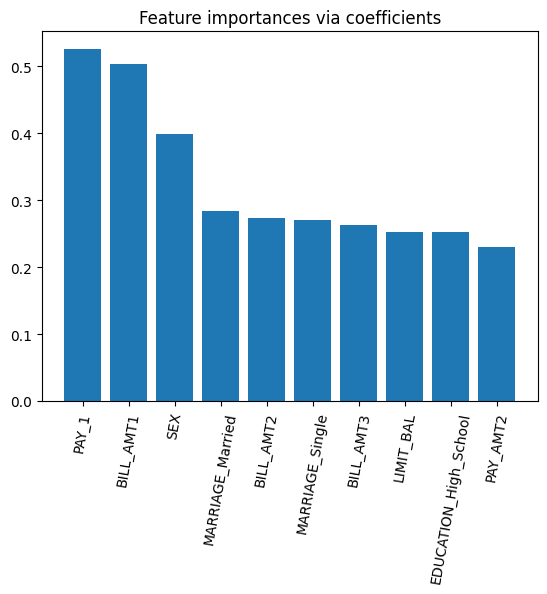

In [267]:
plt.bar(height = feature_importance['Importance'], x = feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [268]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::, 1]

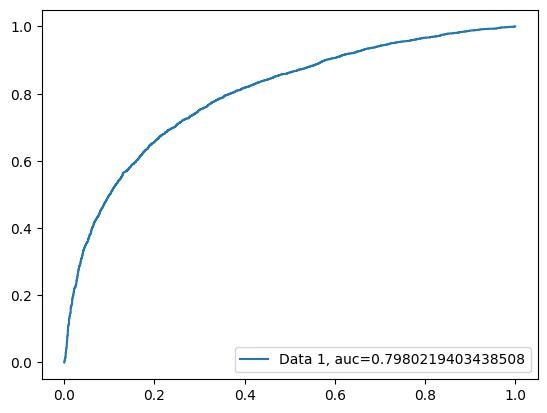

In [269]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

### Implemeting SVC

In [270]:
# from sklearn.svm import SVC

In [271]:
# param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['rbf']}

In [274]:
# grid_svc_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
# grid_svc_clf.fit(X_train, y_train)

In [275]:
# optimized_svc_clf = grid_svc_clf.best_estimator_

In [276]:
# grid_svc_clf.best_params_

In [277]:
# grid_svc_clf.best_score_

In [278]:
# train_class_preds = optimized_svc_clf.predict(X_train)
# test_class_preds = optimized_svc_clf.predict(X_test)

In [279]:
# train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
# test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

# print("The accuracy on train data is ", train_accuracy_lr)
# print("The accuracy on test data is ", test_accuracy_lr)

In [280]:
# test_accuracy_SVC = accuracy_score(y_test, test_class_preds)
# test_precision_score_SVC = precision_score(y_test, test_class_preds)
# test_recall_score_SVC = recall_score(y_test, test_class_preds)
# test_f1_score_SVC = f1_score(y_test, test_class_preds)
# test_roc_score_SVC = roc_auc_score(y_test, test_class_preds)

# print("The accuracy on test data is ", test_accuracy_SVC)
# print("The precision on test data is ", test_precision_score_SVC)
# print("The recall on test data is ", test_recall_score_SVC)
# print("The f1 on test data is ", test_f1_score_SVC)
# print("The roc_score on test data is ", test_roc_score_SVC)

In [281]:

# confusion_mat = confusion_matrix(y_test, test_class_preds)
# classification_rep = classification_report(y_test, test_class_preds)

In [282]:
# print("Confusion Matrix:\n", confusion_mat)
# print("Classification Report:\n", classification_rep)

### Implementing RandomForest

In [283]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [295]:
param_grid = {'criterion': ['log_loss'], 'max_features': ['sqrt'], 'n_estimators': [100,150,200,1000], 'max_depth': [10,20,30]}

In [296]:
grid_rfc_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 5)
grid_rfc_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['log_loss'], 'max_depth': [10, 20, 30],
                         'max_features': ['sqrt'],
                         'n_estimators': [100, 150, 200, 1000]},
             scoring='accuracy', verbose=3)

In [297]:
grid_rfc_clf.best_score_

0.8213505959736066

In [298]:
grid_rfc_clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 1000}

In [299]:
optimal_rf_clf = grid_rfc_clf.best_estimator_

In [300]:
optimal_rf_clf

RandomForestClassifier(criterion='log_loss', max_depth=30, n_estimators=1000)

In [328]:
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [330]:
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9991684789561213
The accuracy on test data is  0.8358654720166212


In [331]:
confusion_mat = confusion_matrix(y_test, test_class_preds)
classification_rep = classification_report(y_test, test_class_preds)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[6520 1181]
 [1347 6354]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      7701
           1       0.84      0.83      0.83      7701

    accuracy                           0.84     15402
   macro avg       0.84      0.84      0.84     15402
weighted avg       0.84      0.84      0.84     15402



### Implementing XGBoost

In [306]:
# import lightgbm as lg 
# import xgboost as xgb

In [307]:
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test)

In [308]:
# learning_rates = [0.01, 0.1, 0.2, 0.5, 1.0]
# for learning_rate in learning_rates:
#     parameters = {'max_depth': 7, 'eta': learning_rate, 'verbosity': 1, 'objective': 'binary:logistic', 'eval_metric':'auc','learning_rate':0.5}

In [309]:
# import datetime
# from datetime import datetime
# num_round = 50
# start = datetime.now()
# xg = xgb.train(parameters, dtrain, num_round)
# stop = datetime.now()

In [310]:
# execution_time_xgb = stop-start
# execution_time_xgb

In [311]:
# train_class_preds_probs=xg.predict(dtrain) 
# test_class_preds_probs =xg.predict(dtest) 

In [312]:
# len(train_class_preds_probs)

In [313]:
# train_class_preds = []
# test_class_preds = []

# for i in range(0, len(train_class_preds_probs)):
#     if train_class_preds_probs[i] >= 0.5:
#         train_class_preds.append(1)
#     else:
#         train_class_preds.append(0)

# for i in range(0, len(test_class_preds_probs)):
#     if test_class_preds_probs[i] >= 0.5:
#         test_class_preds.append(1)
#     else:
#         test_class_preds.append(0)

In [314]:
# test_class_preds_probs[:20]

In [315]:
# test_class_preds[:20]

In [316]:
# len(y_train)

In [317]:
# len(train_class_preds)

In [318]:
# train_accuracy_xgb = accuracy_score(y_train,train_class_preds)
# test_accuracy_xgb = accuracy_score(y_test,test_class_preds)

# print("The accuracy of train data is: ", train_accuracy_xgb)
# print("The accuracy of test data is: ", test_accuracy_xgb)

In [319]:
# confusion_mat = confusion_matrix(y_test,test_class_preds)
# classification_rep = classification_report(y_test, test_class_preds)
# print("Confusion Matrix:\n", confusion_mat)
# print("Classification Report:\n", classification_rep)

### Hyperparameter Tuning 

In [320]:
# from xgboost import XGBClassifier

In [321]:
# param_test1 = {'max_depth': range(3,10,2),
#                'min_child_weight': range(1,6,2)
# }
# gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate = 0.1, n_estimators=140, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27), param_grid = param_test1, scoring='accuracy', n_jobs=-1, cv=3, verbose = 2)
# gsearch1.fit(X_train, y_train)

In [322]:
# gsearch1.best_score_

In [323]:
# optimal_xgb = gsearch1.best_estimator_

In [324]:
# train_class_preds = optimal_xgb.predict(X_train)
# test_class_preds = optimal_xgb.predict(X_test)

In [325]:
# train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
# test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

# print("The accuracy on train data is ", train_accuracy_xgb_tuned)
# print("The accuracy on test data is ", test_accuracy_xgb_tuned)

In [326]:
# confusion_mat = confusion_matrix(y_test, test_class_preds)
# classification_rep = classification_report(y_test, test_class_preds)

# print("confusion_matrix: \n", confusion_mat)
# print("classification_report: \n", classification_rep)

In [327]:
# import torch 
# model_save_name = 'xgb_optimized_classifier.pt'
# path = F"./{model_save_name}"
# torch.save(optimal_xgb, path)

### Stacking Classifier

In [ ]:
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import StackingClassifier
# from sklearn.metrics import accuracy_score

# # Define base models
# base_models = [
#     ('lr', LogisticRegression(C=1, solver='liblinear', max_iter=1000)),
#     ('rf', RandomForestClassifier(criterion='log_loss', max_depth=30, n_estimators=1000)),
#     ('gb', GradientBoostingClassifier(n_estimators=100)),
#     ('svc', SVC())
# ]

# # Define meta-model (StackingClassifier)
# meta_model = LogisticRegression(C=1, solver='liblinear', max_iter=1000)

# # Create stacking classifier
# stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# # Train stacking classifier
# stacking_clf.fit(X_train, y_train)

# # Make predictions
# y_pred = stacking_clf.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy of stacking classifier:", accuracy)


In [ ]:
# train_pred = stacking_clf.predict(X_train)